<a href="https://colab.research.google.com/github/Shilpa393/ML-Health-Project/blob/main/HealthCare_Project_Shilpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
admission = pd.read_csv('/content/drive/MyDrive/ADMISSIONS.csv')
patients = pd.read_csv('/content/drive/MyDrive/PATIENTS.csv')
chartevents = pd.read_csv('/content/drive/MyDrive/CHARTEVENTS.csv')
icustays = pd.read_csv('/content/drive/MyDrive/ICUSTAYS.csv')

<ipython-input-3-da97cffbbd20>:3: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv('/content/drive/MyDrive/CHARTEVENTS.csv')


In [ ]:
admission.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [ ]:
patients.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [ ]:
chartevents.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,NaN,NaN
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,NaN,NaN
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,NaN,NaN
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,NaN,NaN
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,NaN,NaN


In [ ]:
chartevents[chartevents['warning']==1]

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
30,5279051,40124,126179,279554.0,220228,2130-02-04 06:44:00,2130-02-04 07:25:00,20889,8.3,8.3,g/dl,1.0,0.0,NaN,NaN
31,5279052,40124,126179,279554.0,220545,2130-02-04 06:44:00,2130-02-04 07:25:00,20889,25.2,25.2,%,1.0,0.0,NaN,NaN
35,5279056,40124,126179,279554.0,220615,2130-02-04 06:44:00,2130-02-04 08:16:00,20889,1.8,1.8,mg/dL,1.0,0.0,NaN,NaN
36,5279057,40124,126179,279554.0,220621,2130-02-04 06:44:00,2130-02-04 08:16:00,20889,144.0,144.0,mg/dL,1.0,0.0,NaN,NaN
42,5279063,40124,126179,279554.0,225624,2130-02-04 06:44:00,2130-02-04 08:16:00,20889,31.0,31.0,mg/dL,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752547,274483935,44212,163189,239396.0,224084,2123-12-22 14:00:00,2123-12-22 18:18:00,19079,Chair,NaN,NaN,1.0,0.0,NaN,NaN
756302,274491869,44228,103379,217992.0,224023,2170-12-16 11:00:00,2170-12-16 13:38:00,17478,Social Services,NaN,NaN,1.0,0.0,NaN,NaN
756401,274491968,44228,103379,217992.0,223907,2170-12-16 16:00:00,2170-12-16 16:38:00,17478,3mm,NaN,NaN,1.0,0.0,NaN,NaN
756409,274491976,44228,103379,217992.0,223921,2170-12-16 16:00:00,2170-12-16 16:39:00,17478,Double Vision,NaN,NaN,1.0,0.0,NaN,NaN


In [ ]:
chartevents['value'].unique()

array([95.9, 2222221.7, 15.0, ..., 'Wheel chair', 'Double Vision',
       'Puncture wound'], dtype=object)

In [ ]:
icustays.head()

,row_id,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,outtime,los
0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325
1,12747,10011,105331,232110,carevue,MICU,MICU,15,15,2126-08-14 22:34:00,2126-08-28 18:59:00,13.8507
2,12749,10013,165520,264446,carevue,MICU,MICU,15,15,2125-10-04 23:38:00,2125-10-07 15:13:52,2.6499
3,12754,10017,199207,204881,carevue,CCU,CCU,7,7,2149-05-29 18:52:29,2149-05-31 22:19:17,2.1436
4,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43:56,2163-05-16 03:47:04,1.2938


#Data Pre-processing

## Data preprocessing of patients dataframe


In [ ]:
patients.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [ ]:
#Creating a copy of the patients dataframe
patients_copy = patients.copy()

In [ ]:
#Dropping off the columns from the patients dataframe
patients_copy = patients_copy.drop(columns = ['row_id','dod_hosp','dod_ssn','expire_flag'])

In [ ]:
patients_copy.head()

,subject_id,gender,dob,dod
0,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00
1,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00
2,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00
3,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00
4,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00


In [ ]:
#converting dob and dod to date_time
patients_copy['dob'] = pd.to_datetime(patients_copy['dob'])
patients_copy['dod'] = pd.to_datetime(patients_copy['dod'])

In [ ]:
#One-hot encoding for gender
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(sparse = False)
gender_encoded = encode.fit_transform(patients[['gender']])
gender_encoded_df = pd.DataFrame(gender_encoded,columns = encode.get_feature_names_out(['gender']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
patients_copy.head()

,subject_id,gender,dob,dod
0,10006,F,2094-03-05,2165-08-12
1,10011,F,2090-06-05,2126-08-28
2,10013,F,2038-09-03,2125-10-07
3,10017,F,2075-09-21,2152-09-12
4,10019,M,2114-06-20,2163-05-15


In [ ]:
gender_encoded_df.head()

,gender_F,gender_M
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
#concatenating the patients dataframe and gender_encoded_df dataframe
patients_copy_1 = pd.concat([patients_copy,gender_encoded_df],axis = 1)

In [ ]:
patients_copy_1.head()

,subject_id,gender,dob,dod,gender_F,gender_M
0,10006,F,2094-03-05,2165-08-12,1.0,0.0
1,10011,F,2090-06-05,2126-08-28,1.0,0.0
2,10013,F,2038-09-03,2125-10-07,1.0,0.0
3,10017,F,2075-09-21,2152-09-12,1.0,0.0
4,10019,M,2114-06-20,2163-05-15,0.0,1.0


In [ ]:
#Dropping the original gender column as it is binary encoded
patients_copy_1= patients_copy_1.drop(columns = ['gender'])

In [ ]:
patients_copy_1.head()

,subject_id,dob,dod,gender_F,gender_M
0,10006,2094-03-05,2165-08-12,1.0,0.0
1,10011,2090-06-05,2126-08-28,1.0,0.0
2,10013,2038-09-03,2125-10-07,1.0,0.0
3,10017,2075-09-21,2152-09-12,1.0,0.0
4,10019,2114-06-20,2163-05-15,0.0,1.0


In [ ]:
#Type casting of gender encoded columns into integer as it is in float
patients_copy_1[['gender_F','gender_M']] = patients_copy_1[['gender_F','gender_M']].astype(int)

In [ ]:
patients_copy_1.head()

,subject_id,dob,dod,gender_F,gender_M
0,10006,2094-03-05,2165-08-12,1,0
1,10011,2090-06-05,2126-08-28,1,0
2,10013,2038-09-03,2125-10-07,1,0
3,10017,2075-09-21,2152-09-12,1,0
4,10019,2114-06-20,2163-05-15,0,1


## Data Preprocessing of admissions dataframe


In [ ]:
admission.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [ ]:
# Creating a copy of admission dataframe
admission_copy = admission.copy()

In [ ]:
admission_copy.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [ ]:
# Dropping the columns from the admission dataframe
admission_copy = admission_copy.drop(columns = ['row_id','insurance','language','religion','marital_status','ethnicity','edregtime','edouttime'])

In [ ]:
# Converting admittime,dischtime into datetime format
admission_copy['admittime'] = pd.to_datetime(admission_copy['admittime'])
admission_copy['dischtime'] = pd.to_datetime(admission_copy['dischtime'])

In [ ]:
# Replacing NaN values of the deathtime column with Unknown where hospital_expire_flag is 0
admission_copy['deathtime'] = admission_copy['deathtime'].fillna('Unknown')

In [ ]:
# Checking if the NaN values are replaced with 'Unknown' only for hospital_expire_flag = 0
death_time = admission_copy[admission_copy['hospital_expire_flag']==0]
death_time

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,diagnosis,hospital_expire_flag,has_chartevents_data
0,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SEPSIS,0,1
3,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,HUMERAL FRACTURE,0,1
5,10026,103770,2195-05-17 07:39:00,2195-05-24 11:45:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,STROKE/TIA,0,1
6,10027,199395,2190-07-13 07:15:00,2190-07-25 14:00:00,Unknown,ELECTIVE,PHYS REFERRAL/NORMAL DELI,SNF,MITRAL REGURGITATION;CORONARY ARTERY DISEASE\...,0,1
7,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,SYNCOPE;TELEMETRY,0,1
...,...,...,...,...,...,...,...,...,...,...,...
123,44083,131048,2112-05-22 15:37:00,2112-05-25 13:30:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SHORTNESS OF BREATH,0,1
124,44083,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,PERICARDIAL EFFUSION,0,1
126,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,Unknown,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
127,44222,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,BRADYCARDIA,0,1


In [ ]:
#Converting the deathtime dates to datetime format where hospital_expire_flag is 1
admission_copy.loc[admission_copy['hospital_expire_flag']==1,'deathtime'] = pd.to_datetime(admission_copy.loc[admission_copy['hospital_expire_flag']==1,'deathtime'])

In [ ]:
# Checking if the datetime values are handled with proper datetime format only for hospital_expire_flag = 1
death_time = admission_copy[admission_copy['hospital_expire_flag']==1]
death_time

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,diagnosis,hospital_expire_flag,has_chartevents_data
1,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,HEPATITIS B,1,1
2,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,SEPSIS,1,1
4,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,ALCOHOLIC HEPATITIS,1,1
11,10036,189483,2185-03-24 16:56:00,2185-03-26 09:15:00,2185-03-26 09:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,SEPSIS,1,1
17,10045,126949,2129-11-24 00:31:00,2129-12-01 01:45:00,2129-12-01 01:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,FEVER,1,1
21,10059,122098,2150-08-22 17:33:00,2150-08-29 18:20:00,2150-08-29 18:20:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,LOWER GI BLEED,1,1
23,10064,111761,2127-03-19 14:39:00,2127-03-19 18:09:00,2127-03-19 18:09:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,SUBDURAL HEMATOMA/S/P FALL,1,1
25,10067,160442,2130-10-06 01:34:00,2130-10-06 02:29:00,2130-10-06 02:29:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,S/P MOTORCYCLE ACCIDENT,1,1
26,10069,146672,2188-02-08 11:15:00,2188-02-27 18:41:00,2188-02-27 18:41:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,SEIZURE,1,1
28,10076,198503,2107-03-21 21:16:00,2107-03-30 12:00:00,2107-03-30 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,LUNG CANCER;SHORTNESS OF BREATH,1,1


In [ ]:
#Finding the unique values of admission_type
admission_copy['admission_type'].unique()

array(['EMERGENCY', 'ELECTIVE', 'URGENT'], dtype=object)

In [ ]:
admission_copy

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,diagnosis,hospital_expire_flag,has_chartevents_data
0,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SEPSIS,0,1
1,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,HEPATITIS B,1,1
2,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,SEPSIS,1,1
3,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,HUMERAL FRACTURE,0,1
4,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,ALCOHOLIC HEPATITIS,1,1
...,...,...,...,...,...,...,...,...,...,...,...
124,44083,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,PERICARDIAL EFFUSION,0,1
125,44154,174245,2178-05-14 20:29:00,2178-05-15 09:45:00,2178-05-15 09:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,ALTERED MENTAL STATUS,1,1
126,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,Unknown,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
127,44222,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,Unknown,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,BRADYCARDIA,0,1


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
#Binary encoding for the admission_type column
encode = ce.BinaryEncoder(cols = ['admission_type'])
admission_copy = encode.fit_transform(admission_copy)

In [ ]:
#Checking unique values for the column - admission_location
admission_copy['admission_location'].unique()

array(['EMERGENCY ROOM ADMIT', 'TRANSFER FROM HOSP/EXTRAM',
       'PHYS REFERRAL/NORMAL DELI', 'CLINIC REFERRAL/PREMATURE',
       'TRANSFER FROM SKILLED NUR'], dtype=object)

In [ ]:
#Binary for the admission_location column
encode = ce.BinaryEncoder(cols=['admission_location'])
ad_loc_encode = encode.fit_transform(admission_copy[['admission_location']])
ad_loc_encode_df = pd.DataFrame(ad_loc_encode,columns = encode.get_feature_names_out(['admission_location'])).astype(int)

In [ ]:
admission_copy_1 = pd.concat([admission_copy,ad_loc_encode_df],axis = 1)

In [ ]:
admission_copy_1

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type_0,admission_type_1,admission_location,discharge_location,diagnosis,hospital_expire_flag,has_chartevents_data,admission_location_0,admission_location_1,admission_location_2
0,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,Unknown,0,1,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SEPSIS,0,1,0,0,1
1,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,0,1,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,HEPATITIS B,1,1,0,1,0
2,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,0,1,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,SEPSIS,1,1,0,1,0
3,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,Unknown,0,1,EMERGENCY ROOM ADMIT,SNF,HUMERAL FRACTURE,0,1,0,0,1
4,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,0,1,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,ALCOHOLIC HEPATITIS,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,44083,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,Unknown,0,1,EMERGENCY ROOM ADMIT,HOME,PERICARDIAL EFFUSION,0,1,0,0,1
125,44154,174245,2178-05-14 20:29:00,2178-05-15 09:45:00,2178-05-15 09:45:00,0,1,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,ALTERED MENTAL STATUS,1,1,0,0,1
126,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,Unknown,0,1,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1,0,1,0
127,44222,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,Unknown,0,1,EMERGENCY ROOM ADMIT,HOME,BRADYCARDIA,0,1,0,0,1


In [ ]:
#Dropping off admission_location column as it is encoded
admission_copy_1 = admission_copy_1.drop(columns = ['admission_location'])

In [ ]:
admission_copy_1.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type_0,admission_type_1,discharge_location,diagnosis,hospital_expire_flag,has_chartevents_data,admission_location_0,admission_location_1,admission_location_2
0,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,Unknown,0,1,HOME HEALTH CARE,SEPSIS,0,1,0,0,1
1,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,0,1,DEAD/EXPIRED,HEPATITIS B,1,1,0,1,0
2,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,0,1,DEAD/EXPIRED,SEPSIS,1,1,0,1,0
3,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,Unknown,0,1,SNF,HUMERAL FRACTURE,0,1,0,0,1
4,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,0,1,DEAD/EXPIRED,ALCOHOLIC HEPATITIS,1,1,0,1,0


##Data Preprocessing for icu_stays dataframe


In [ ]:
#Creating a copy of the dataframe - 'icustays'
icustays_copy = icustays.copy()

In [ ]:
icustays_copy.head()

,row_id,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,outtime,los
0,12742,10006,142345,206504,carevue,MICU,MICU,52,52,2164-10-23 21:10:15,2164-10-25 12:21:07,1.6325
1,12747,10011,105331,232110,carevue,MICU,MICU,15,15,2126-08-14 22:34:00,2126-08-28 18:59:00,13.8507
2,12749,10013,165520,264446,carevue,MICU,MICU,15,15,2125-10-04 23:38:00,2125-10-07 15:13:52,2.6499
3,12754,10017,199207,204881,carevue,CCU,CCU,7,7,2149-05-29 18:52:29,2149-05-31 22:19:17,2.1436
4,12755,10019,177759,228977,carevue,MICU,MICU,15,15,2163-05-14 20:43:56,2163-05-16 03:47:04,1.2938


In [ ]:
for features in icustays_copy.columns:
  g=icustays_copy[features].nunique()
  print(f'{features} has {g} unique values')

row_id has 136 unique values
subject_id has 100 unique values
hadm_id has 129 unique values
icustay_id has 136 unique values
dbsource has 2 unique values
first_careunit has 5 unique values
last_careunit has 5 unique values
first_wardid has 9 unique values
last_wardid has 9 unique values
intime has 136 unique values
outtime has 136 unique values
los has 136 unique values


In [ ]:
icustays_copy['dbsource'].unique()

array(['carevue', 'metavision'], dtype=object)

In [ ]:
icustays_copy['first_careunit'].unique()

array(['MICU', 'CCU', 'SICU', 'CSRU', 'TSICU'], dtype=object)

In [ ]:
icustays_copy['first_wardid'].unique()

array([52, 15,  7, 33, 12, 23, 14, 50, 57])

In [ ]:
icustays_copy['last_wardid'].unique()

array([52, 15,  7, 33, 12, 23, 14, 57, 50])

In [ ]:
#Dropping the column row_id from icustays_copy dataframe
icustays_copy = icustays_copy.drop(columns = ['row_id'])

In [ ]:
#Understanding the statistics of los column of icustays dataframe
icustays_copy['los'].describe()

count    136.000000
mean       4.452457
std        6.196828
min        0.105900
25%        1.233525
50%        2.111450
75%        4.329050
max       35.406500
Name: los, dtype: float64

In [ ]:
#Binning of los column of icustays dataframe
bins = [0,10,20,30,40]
labels = ['Short_stay','Medium_stay','Long_stay','Very_long_stay']
icustays_copy['los_group'] = pd.cut(icustays_copy['los'],bins= bins, labels=labels)

In [ ]:
#Binary Encoding of los_group column
#Assuming Short_stay -> 1
#         Medium_stay -> 2
#         Long_stay -> 3
#         Very_long_stay -> 4

encode = ce.BinaryEncoder()
los_group_encoded = encode.fit_transform(icustays_copy['los_group'])
icustays_copy = pd.concat([icustays_copy,los_group_encoded],axis = 1)


In [ ]:
#Dropping off the los column
icustays_copy = icustays_copy.drop(columns = ['los'])

In [ ]:
#Converting intime and outtime to datetime format
icustays_copy['intime'] = pd.to_datetime(icustays_copy['intime'])
icustays_copy['outtime'] = pd.to_datetime(icustays_copy['outtime'])

In [ ]:
#Checking for dbsource unique values
icustays_copy['dbsource'].unique()

array(['carevue', 'metavision'], dtype=object)

In [ ]:
#Binary Encoding of dbsource column
#Assuming carevue -> 1
#         metavision-> 2
encode = ce.BinaryEncoder()
dbsource_encode = encode.fit_transform(icustays_copy['dbsource'])
icustays_copy = pd.concat([icustays_copy,dbsource_encode],axis = 1)

In [ ]:
#Dropping of dbsource column
icustays_copy = icustays_copy.drop(columns= ['dbsource'])

In [ ]:
#Checking unique values of first_careunit
icustays_copy['first_careunit'].unique()

array(['MICU', 'CCU', 'SICU', 'CSRU', 'TSICU'], dtype=object)

In [ ]:
#Checking unique values of last_careunit
icustays_copy['last_careunit'].unique()

array(['MICU', 'CCU', 'SICU', 'CSRU', 'TSICU'], dtype=object)

In [ ]:
#Binary encoding for first_careunit
encode = ce.BinaryEncoder(cols = ['first_careunit'])
first_careunit_encode = encode.fit_transform(icustays_copy['first_careunit'])
icustays_copy = pd.concat([icustays_copy,first_careunit_encode],axis = 1)

In [ ]:
#Binary encoding for last_careunit
encode = ce.BinaryEncoder(cols = ['last_careunit'])
first_careunit_encode = encode.fit_transform(icustays_copy['last_careunit'])
icustays_copy = pd.concat([icustays_copy,first_careunit_encode],axis = 1)

In [ ]:
#Dropping the careunits column
icustays_copy = icustays_copy.drop(columns = ['first_careunit','last_careunit'])
#icustays_copy = icustays_copy.drop(columns = ['los_group'])

In [ ]:
#Checking for null values for icustay_id column
icustays_copy['icustay_id'].isnull().sum()

0

In [ ]:
icustays_copy.sample(5)

,subject_id,hadm_id,icustay_id,first_wardid,last_wardid,intime,outtime,los_group,los_group_0,los_group_1,los_group_2,dbsource_0,dbsource_1,first_careunit_0,first_careunit_1,first_careunit_2,last_careunit_0,last_careunit_1,last_careunit_2
42,10106,133283,217960,12,12,2161-09-15 03:04:48,2161-09-17 01:14:00,Short_stay,0,0,1,0,1,0,0,1,0,0,1
115,43735,112662,293363,23,23,2128-11-04 16:06:14,2128-11-05 17:07:58,Short_stay,0,0,1,1,0,0,0,1,0,0,1
16,10044,124073,270154,52,52,2152-10-03 02:02:49,2152-10-07 16:52:38,Short_stay,0,0,1,0,1,0,0,1,0,0,1
13,10040,157839,272047,12,12,2147-02-23 11:43:47,2147-02-25 14:51:52,Short_stay,0,0,1,0,1,0,0,1,0,0,1
4,10019,177759,228977,15,15,2163-05-14 20:43:56,2163-05-16 03:47:04,Short_stay,0,0,1,0,1,0,0,1,0,0,1


##Data Preprocessing of chart events dataframe


In [ ]:
chartevents.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,NaN,NaN
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,NaN,NaN
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,NaN,NaN
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,NaN,NaN
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,NaN,NaN


In [ ]:
#Creating copy of chartevents dataframe
chartevents_copy = chartevents.copy()

In [ ]:
chartevents_copy

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,NaN,NaN
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,NaN,NaN
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,NaN,NaN
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,NaN,NaN
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758350,274493917,44228,103379,217992.0,226228,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,F,2.0,NaN,0.0,0.0,NaN,NaN
758351,274493918,44228,103379,217992.0,226381,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,Single,1.0,NaN,0.0,0.0,NaN,NaN
758352,274493919,44228,103379,217992.0,226543,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,Not specified,12.0,NaN,0.0,0.0,NaN,NaN
758353,274493920,44228,103379,217992.0,226544,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,English,1.0,NaN,0.0,0.0,NaN,NaN


In [ ]:
#Dropping off columns from chartevents_copy dataframe
chartevents_copy = chartevents_copy.drop(columns = ['row_id','error','value','stopped'])

In [ ]:
#Checking for null values for icustay_id in chartevents dataframe
chartevents_copy['icustay_id'].isnull().sum()

81

In [ ]:
#Handling NaNs of icustay_id
chartevents_copy['icustay_id'] = chartevents_copy['icustay_id'].fillna('Not Admitted to ICU')

In [ ]:
#Filtering rows for icustay_id = 'Not Admitted to ICU'
chartevents_copy[chartevents_copy['icustay_id']=='Not Admitted to ICU']

,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,valuenum,valueuom,warning,resultstatus
3834,40310,186361,Not Admitted to ICU,225637,2144-07-12 08:00:00,2144-07-13 11:45:00,20889,0.0,%,0.0,NaN
3835,40310,186361,Not Admitted to ICU,225638,2144-07-12 08:00:00,2144-07-13 11:45:00,20889,5.0,%,0.0,NaN
3836,40310,186361,Not Admitted to ICU,225639,2144-07-12 08:00:00,2144-07-13 11:45:00,20889,0.0,%,0.0,NaN
3837,40310,186361,Not Admitted to ICU,225640,2144-07-12 08:00:00,2144-07-13 11:45:00,20889,1.0,%,0.0,NaN
3838,40310,186361,Not Admitted to ICU,225641,2144-07-12 08:00:00,2144-07-13 11:45:00,20889,37.0,%,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
754702,44212,163189,Not Admitted to ICU,225323,2124-11-30 20:00:00,2123-12-02 01:06:00,20704,NaN,NaN,0.0,NaN
754703,44212,163189,Not Admitted to ICU,227124,2124-11-30 20:00:00,2123-12-02 01:06:00,20704,NaN,NaN,0.0,NaN
754704,44212,163189,Not Admitted to ICU,227753,2124-11-30 20:00:00,2123-12-02 01:06:00,20704,NaN,NaN,0.0,NaN
754705,44212,163189,Not Admitted to ICU,227756,2124-11-30 20:00:00,2123-12-02 01:05:00,20704,NaN,NaN,0.0,NaN


In [ ]:
#Type casting of icustay_id values which are float into integer

def convert_to_int(value):
    try:
        # Check if the value is a float and has no fractional part
        if isinstance(value, float) and value.is_integer():
            return int(value)
        # Check if the value is a string that can be cast to float and then to int
        if isinstance(value, str):
            float_value = float(value)
            if float_value.is_integer():
                return int(float_value)
    except ValueError:
        return value
    return value

chartevents_copy['icustay_id'] = chartevents_copy['icustay_id'].apply(convert_to_int)

In [ ]:
#Converting the charttime and storetime columns into datetime format
chartevents_copy['charttime'] = pd.to_datetime(chartevents_copy['charttime'])
chartevents_copy['storetime'] = pd.to_datetime(chartevents_copy['storetime'])

In [ ]:
#Checking for null values of cgid
chartevents_copy['cgid'].isnull().sum()

0

In [ ]:
#Handling of NaN for value_num column
chartevents_copy['valuenum'] = chartevents_copy['valuenum'].fillna('No Results')

In [ ]:
#Type casting of valuenum values which are float into integer

def convert_to_int(value):
    try:
        # Check if the value is a float and has no fractional part
        if isinstance(value, float) and value.is_integer():
            return int(value)
        # Check if the value is a string that can be cast to float and then to int
        if isinstance(value, str):
            float_value = float(value)
            if float_value.is_integer():
                return int(float_value)
    except ValueError:
        return value
    return value

chartevents_copy['valuenum'] = chartevents_copy['valuenum'].apply(convert_to_int)

In [ ]:
chartevents_copy

,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,valuenum,valueuom,warning,resultstatus
0,40124,126179,279554,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,?F,0.0,NaN
1,40124,126179,279554,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,cmH2O,0.0,NaN
2,40124,126179,279554,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15,insp/min,0.0,NaN
3,40124,126179,279554,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94,bpm,0.0,NaN
4,40124,126179,279554,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163,mmHg,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
758350,44228,103379,217992,226228,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,2,NaN,0.0,NaN
758351,44228,103379,217992,226381,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,1,NaN,0.0,NaN
758352,44228,103379,217992,226543,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,12,NaN,0.0,NaN
758353,44228,103379,217992,226544,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,1,NaN,0.0,NaN


In [ ]:
#Handling NaNs of valueuom column
chartevents_copy['valueuom'] = chartevents_copy['valueuom'].fillna('Not Found')

In [ ]:
chartevents_copy['valueuom'].unique()

array(['?F', 'cmH2O', 'insp/min', 'bpm', 'mmHg', '%', 'kg', 'g/dl',
       'K/uL', 'IU/L', 'mEq/L', 'mg/dL', 'ng/mL', 'g/dL', 'sec',
       'Not Found', 'L/min', 'mL', 'units', 'mmol/L', 'cm', '?C', 'Inch',
       'mOsm/kg', 'pg/mL', 'ug/dL', 'ug/mL', '#/uL', 'mL/beat', 'kcal/kg',
       'g/kg', 'umol/L', 'min', 'ml/hr', 'mV', 'mA', '/min', 'ml/min',
       'years', 'BPM', 'Deg. C', 'Deg. F', 'number', 'points', 'mg/dl',
       'gm/dl', '/mic l', 'm2', 'inches', '...', 'lpm', 'kg * m', 'g * m',
       'ml', 'torr', '.', 'ml/B', 'g*m/m2', 'ml/dl', 'ml/cmH', 'cc/min',
       'kg x m', 'ml/m/m', 'V-mA', 'L', 'pH', 'L/m', 'ng', 'sum', '#',
       'decFrc', 'liters'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np


# Replace placeholders with NaN
placeholders = ['...', '#','.']
chartevents_copy['valueuom'] = chartevents_copy['valueuom'].replace(placeholders,'No unit')

# Ensure valuenum_standardized contains only numeric values
chartevents_copy['valuenum'] = pd.to_numeric(chartevents_copy['valuenum'], errors='coerce')

# Consolidated function to standardize units
def standardize_units(row):
    unit = row['valueuom']
    value = row['valuenum']

    # Convert all temperatures to Celsius
    if unit in ['?F', 'Deg. F']:
        if pd.notna(value):
            row['valuenum'] = (value - 32) * 5.0 / 9.0
        row['valueuom'] = 'Deg. C'
    elif unit in ['?C', 'Deg. C']:
        row['valueuom'] = 'Deg. C'

    # Convert #/uL to #/mL
    elif unit == '#/uL':
        if pd.notna(value):
            row['valuenum'] = value * 1000  # 1 uL is 1/1000 mL
        row['valueuom'] = '#/mL'

    return row

# Apply the standardization function
chartevents_copy = chartevents_copy.apply(standardize_units, axis=1)

# Handle negative values (if applicable)
chartevents_copy['valuenum'] = chartevents_copy['valuenum'].apply(lambda x: max(x, 0) if pd.notna(x) else x)

In [ ]:
chartevents_copy.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'itemid', 'charttime',
       'storetime', 'cgid', 'valuenum', 'valueuom', 'warning', 'resultstatus'],
      dtype='object')

In [ ]:
chartevents_copy['resultstatus'].unique()

array([nan, 'Manual', 'Final'], dtype=object)

In [ ]:
#Handling NaNs of resultstatus column
chartevents_copy['resultstatus'] = chartevents_copy['resultstatus'].fillna('No Results Found')

In [ ]:
#Converting float values to numeric for warning column
chartevents_copy['warning'] = pd.to_numeric(chartevents_copy['warning'], errors='coerce')

#Merging of dataframes created after preprocessing

##patients_copy_1
##admission_copy_1
##icustays_copy
##chartevents_copy


In [ ]:
patients_copy_1.columns

Index(['subject_id', 'dob', 'dod', 'gender_F', 'gender_M'], dtype='object')

In [ ]:
admission_copy_1.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type_0', 'admission_type_1', 'discharge_location',
       'diagnosis', 'hospital_expire_flag', 'has_chartevents_data',
       'admission_location_0', 'admission_location_1', 'admission_location_2'],
      dtype='object')

In [ ]:
icustays_copy.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'first_wardid', 'last_wardid',
       'intime', 'outtime', 'los_group', 'los_group_0', 'los_group_1',
       'los_group_2', 'dbsource_0', 'dbsource_1', 'first_careunit_0',
       'first_careunit_1', 'first_careunit_2', 'last_careunit_0',
       'last_careunit_1', 'last_careunit_2'],
      dtype='object')

In [ ]:
chartevents_copy.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'itemid', 'charttime',
       'storetime', 'cgid', 'valuenum', 'valueuom', 'warning', 'resultstatus'],
      dtype='object')

In [ ]:
#merged_dataframe = pd.merge(patients_copy_1,admission_copy_1,on = 'subject_id')


In [ ]:
#merged_dataframe1 = pd.merge(merged_dataframe,icustays_copy,on = 'subject_id')

In [ ]:
#merged_dataframe1.head()

In [ ]:
merged_dataframe_1 = pd.merge(chartevents_copy,icustays_copy,on = ['subject_id','hadm_id','icustay_id'])

In [ ]:
merged_dataframe_1.head()

,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,valuenum,valueuom,warning,...,los_group_1,los_group_2,dbsource_0,dbsource_1,first_careunit_0,first_careunit_1,first_careunit_2,last_careunit_0,last_careunit_1,last_careunit_2
0,40124,126179,279554,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,35.5,Deg. C,0.0,...,0,1,1,0,0,0,1,0,0,1
1,40124,126179,279554,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,cmH2O,0.0,...,0,1,1,0,0,0,1,0,0,1
2,40124,126179,279554,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,insp/min,0.0,...,0,1,1,0,0,0,1,0,0,1
3,40124,126179,279554,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,bpm,0.0,...,0,1,1,0,0,0,1,0,0,1
4,40124,126179,279554,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,mmHg,0.0,...,0,1,1,0,0,0,1,0,0,1


In [ ]:
merged_dataframe_2 = pd.merge(merged_dataframe_1, admission_copy_1, on=['subject_id', 'hadm_id'])


In [ ]:
merged_dataframe_2.head()

,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,valuenum,valueuom,warning,...,deathtime,admission_type_0,admission_type_1,discharge_location,diagnosis,hospital_expire_flag,has_chartevents_data,admission_location_0,admission_location_1,admission_location_2
0,40124,126179,279554,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,35.5,Deg. C,0.0,...,Unknown,0,1,SNF,SHORTNESS OF BREATH,0,1,0,0,1
1,40124,126179,279554,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,cmH2O,0.0,...,Unknown,0,1,SNF,SHORTNESS OF BREATH,0,1,0,0,1
2,40124,126179,279554,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,insp/min,0.0,...,Unknown,0,1,SNF,SHORTNESS OF BREATH,0,1,0,0,1
3,40124,126179,279554,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,bpm,0.0,...,Unknown,0,1,SNF,SHORTNESS OF BREATH,0,1,0,0,1
4,40124,126179,279554,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,mmHg,0.0,...,Unknown,0,1,SNF,SHORTNESS OF BREATH,0,1,0,0,1


In [ ]:
merged_dataframe_final = pd.merge(merged_dataframe_2, patients_copy_1, on='subject_id', how='left')

In [ ]:
merged_dataframe_final.head()

,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,valuenum,valueuom,warning,...,diagnosis,hospital_expire_flag,has_chartevents_data,admission_location_0,admission_location_1,admission_location_2,dob,dod,gender_F,gender_M
0,40124,126179,279554,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,35.5,Deg. C,0.0,...,SHORTNESS OF BREATH,0,1,0,0,1,2063-07-05,2130-11-03,1,0
1,40124,126179,279554,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,cmH2O,0.0,...,SHORTNESS OF BREATH,0,1,0,0,1,2063-07-05,2130-11-03,1,0
2,40124,126179,279554,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,insp/min,0.0,...,SHORTNESS OF BREATH,0,1,0,0,1,2063-07-05,2130-11-03,1,0
3,40124,126179,279554,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,bpm,0.0,...,SHORTNESS OF BREATH,0,1,0,0,1,2063-07-05,2130-11-03,1,0
4,40124,126179,279554,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,mmHg,0.0,...,SHORTNESS OF BREATH,0,1,0,0,1,2063-07-05,2130-11-03,1,0


In [ ]:
#Merge observations of itemid 807 into itemid 225664
merged_dataframe_final.loc[merged_dataframe_final['itemid'] == 807, 'itemid'] = 225664

In [ ]:
#Cross check if there are any itemid of 807
merged_dataframe_final[merged_dataframe_final['itemid'] == 807]

,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,valuenum,valueuom,warning,...,diagnosis,hospital_expire_flag,has_chartevents_data,admission_location_0,admission_location_1,admission_location_2,dob,dod,gender_F,gender_M


In [ ]:
merged_dataframe_final.isnull().sum()

subject_id                   0
hadm_id                      0
icustay_id                   0
itemid                       0
charttime                    0
storetime                    0
cgid                         0
valuenum                434423
valueuom                     0
warning                 376068
resultstatus                 0
first_wardid                 0
last_wardid                  0
intime                       0
outtime                      0
los_group                    0
los_group_0                  0
los_group_1                  0
los_group_2                  0
dbsource_0                   0
dbsource_1                   0
first_careunit_0             0
first_careunit_1             0
first_careunit_2             0
last_careunit_0              0
last_careunit_1              0
last_careunit_2              0
admittime                    0
dischtime                    0
deathtime                    0
admission_type_0             0
admission_type_1             0
discharg

In [ ]:
merged_dataframe_final.shape

(758244, 43)

# Statistical Analysis

In [ ]:
merged_dataframe_final.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'itemid', 'charttime',
       'storetime', 'cgid', 'valuenum', 'valueuom', 'warning', 'resultstatus',
       'first_wardid', 'last_wardid', 'intime', 'outtime', 'los_group',
       'los_group_0', 'los_group_1', 'los_group_2', 'dbsource_0', 'dbsource_1',
       'first_careunit_0', 'first_careunit_1', 'first_careunit_2',
       'last_careunit_0', 'last_careunit_1', 'last_careunit_2', 'admittime',
       'dischtime', 'deathtime', 'admission_type_0', 'admission_type_1',
       'discharge_location', 'diagnosis', 'hospital_expire_flag',
       'has_chartevents_data', 'admission_location_0', 'admission_location_1',
       'admission_location_2', 'dob', 'dod', 'gender_F', 'gender_M'],
      dtype='object')

In [ ]:
# Filter the DataFrame to keep only the specified item IDs
item_ids_to_keep = [225664, 220051, 223761, 220050]
filtered_df = merged_dataframe_final[merged_dataframe_final['itemid'].isin(item_ids_to_keep)]

In [ ]:
# Select relevant columns for pivot
features = ['subject_id', 'charttime', 'valuenum', 'itemid','hospital_expire_flag']
vital_signs_df = filtered_df[features]

In [ ]:
vital_signs_df.head()

,subject_id,charttime,valuenum,itemid,hospital_expire_flag
0,40124,2130-02-04 04:00:00,35.500000,223761,0
73,40124,2130-02-04 08:00:00,35.666667,223761,0
137,40124,2130-02-04 12:00:00,35.500000,223761,0
174,40124,2130-02-04 16:00:00,35.388889,223761,0
208,40124,2130-02-04 20:00:00,35.888889,223761,0


In [ ]:
vital_signs_df.isnull().sum()

subject_id               0
charttime                0
valuenum                12
itemid                   0
hospital_expire_flag     0
dtype: int64

In [ ]:
#Show the missing rows
vital_signs_df[vital_signs_df['valuenum'].isnull()]

,subject_id,charttime,valuenum,itemid,hospital_expire_flag
453214,10045,2129-11-28 04:00:00,NaN,225664,1
466975,10056,2129-05-02 23:00:00,NaN,225664,0
513972,10069,2188-02-20 01:00:00,NaN,225664,1
514065,10069,2188-02-20 03:00:00,NaN,225664,1
529628,10076,2107-03-29 22:00:00,NaN,225664,1
555096,10094,2180-03-03 07:30:00,NaN,225664,0
560992,10094,2180-03-19 20:00:00,NaN,225664,1
616055,10124,2192-05-01 03:00:00,NaN,225664,1
673211,10126,2171-08-04 15:00:00,NaN,225664,1
674688,10126,2171-08-05 11:30:00,NaN,225664,1


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
#Iterative imputer in a way that the valuenum column is imputed specifically for their respective subject_id

def impute_by_group(group):
  imputer = IterativeImputer(random_state=42)
  group['valuenum'] = imputer.fit_transform(group[['valuenum']])
  return group

vital_signs_df = vital_signs_df.groupby('subject_id').apply(impute_by_group)


In [ ]:
vital_signs_df.head()

subject_id           charttime  valuenum  itemid  \
subject_id                                                            
10006      382268       10006 2164-10-24 00:00:00     149.0  225664   
           382323       10006 2164-10-24 03:00:00      98.0  225664   
           382438       10006 2164-10-24 06:00:00      55.0  225664   
           382485       10006 2164-10-24 08:00:00      93.0  225664   
           382540       10006 2164-10-24 12:00:00     232.0  225664   

                   hospital_expire_flag  
subject_id                               
10006      382268                     0  
           382323                     0  
           382438                     0  
           382485                     0  
           382540                     0

In [ ]:
#Check missing values
vital_signs_df.isnull().sum()

subject_id              0
charttime               0
valuenum                0
itemid                  0
hospital_expire_flag    0
dtype: int64

In [ ]:
#Drop subject_id
vital_signs_df = vital_signs_df.drop(columns = ['subject_id'])

Now,we will break the vital_signs_df into 4 dataframes for 4 different itemids

In [ ]:
#Breaking the vital_signs_df into 4 parts based on 4 different itemids(225664, 220051, 223761, 220050)
glucose_df = vital_signs_df[vital_signs_df['itemid'] == 225664]
bp_diastolic_df = vital_signs_df[vital_signs_df['itemid'] == 220051]
temperature_df = vital_signs_df[vital_signs_df['itemid'] == 223761]
bp_systolic_df = vital_signs_df[vital_signs_df['itemid'] == 220050]

##With Glucose

In [ ]:
glucose_df

charttime  valuenum  itemid  hospital_expire_flag
subject_id                                                                   
10006      382268 2164-10-24 00:00:00     149.0  225664                     0
           382323 2164-10-24 03:00:00      98.0  225664                     0
           382438 2164-10-24 06:00:00      55.0  225664                     0
           382485 2164-10-24 08:00:00      93.0  225664                     0
           382540 2164-10-24 12:00:00     232.0  225664                     0
...                               ...       ...     ...                   ...
44228      378348 2170-12-17 22:00:00     112.0  225664                     0
           378492 2170-12-18 10:00:00     128.0  225664                     0
           378600 2170-12-18 22:00:00     130.0  225664                     0
           378707 2170-12-19 10:00:00     161.0  225664                     0
           378752 2170-12-19 16:00:00     116.0  225664                     0

[2051 rows x 4 columns]

In [ ]:
glucose_pivoted_df = glucose_df.pivot_table(index=['subject_id', 'charttime','hospital_expire_flag'], columns='itemid', values='valuenum')

In [ ]:
glucose_pivoted_df

itemid                                               225664
subject_id charttime           hospital_expire_flag        
10006      2164-10-24 00:00:00 0                      149.0
           2164-10-24 03:00:00 0                       98.0
           2164-10-24 06:00:00 0                       55.0
           2164-10-24 08:00:00 0                       93.0
           2164-10-24 12:00:00 0                      232.0
...                                                     ...
44228      2170-12-17 22:00:00 0                      112.0
           2170-12-18 10:00:00 0                      128.0
           2170-12-18 22:00:00 0                      130.0
           2170-12-19 10:00:00 0                      161.0
           2170-12-19 16:00:00 0                      116.0

[2051 rows x 1 columns]

In [ ]:
glucose_pivoted_df.columns

Index([225664], dtype='int64', name='itemid')

In [ ]:
# Rename columns for clarity
glucose_pivoted_df.columns = ['glucose']

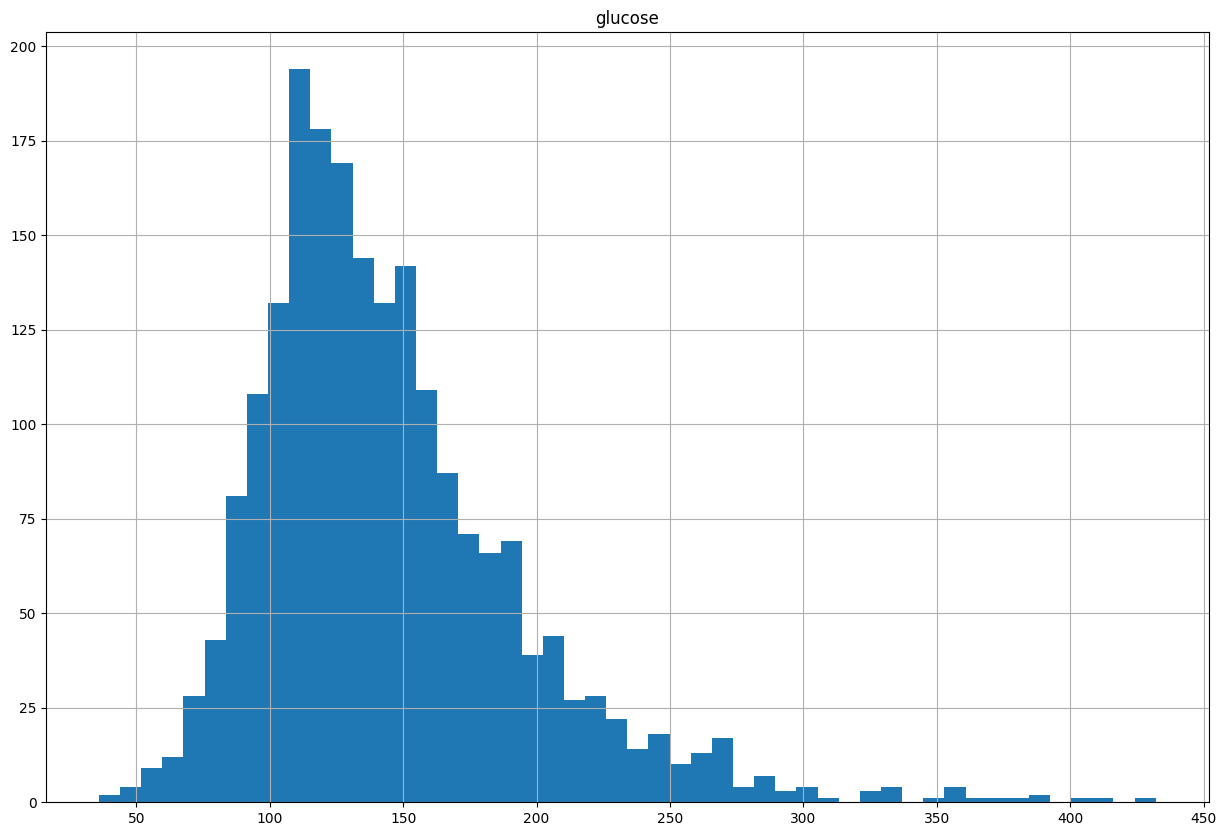

In [ ]:
# Histograms
glucose_pivoted_df.hist(bins=50, figsize=(15, 10))
plt.show()

In [ ]:
glucose_pivoted_df['glucose'].skew()

1.410183424798827

**Shapiro-Wilk test to check normality**

In [ ]:
from scipy import stats

Null Hypothesis (H₀): The data is normally distributed.

Alternative Hypothesis (H₁): The data is not normally distributed.

In [ ]:
# Check normality using Shapiro-Wilk test

stat, p = stats.shapiro(glucose_pivoted_df['glucose'])
print('p=%.3f' % (p))

p=0.000


p-value is less than 0.05, so we reject the Null Hypothesis (H₀). So we can conclude, that the data is not normally distributed.

**Mann-Whitney U Test** - performing t-test for non-normally distributed variables

H₀: The distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is equal to the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

H₁: The distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is different from the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
expired = glucose_pivoted_df[glucose_pivoted_df.index.get_level_values('hospital_expire_flag') == 1]
not_expired = glucose_pivoted_df[glucose_pivoted_df.index.get_level_values('hospital_expire_flag') == 0]

In [ ]:
statistic, p_value = mannwhitneyu(expired['glucose'], not_expired['glucose'])
print(f"p-value: {p_value:.3f}")

p-value: 0.000


p-value is less than 0.05, so we reject the Null Hypothesis (H₀). So we can conclude, that the distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is different from the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

#Anomaly detection of Glucose by Isolation forest

In [ ]:
glucose_pivoted_df.head()

glucose
subject_id charttime           hospital_expire_flag         
10006      2164-10-24 00:00:00 0                       149.0
           2164-10-24 03:00:00 0                        98.0
           2164-10-24 06:00:00 0                        55.0
           2164-10-24 08:00:00 0                        93.0
           2164-10-24 12:00:00 0                       232.0

In [ ]:
#Taking out hospital_expire_flag from index and set as column
glucose_pivoted_df.reset_index(inplace=True)

In [ ]:
#Only keep those rows for which hospital_expire_flag=0
glucose_ad = glucose_pivoted_df[glucose_pivoted_df['hospital_expire_flag']==0]

In [ ]:
glucose_ad.drop(columns=['hospital_expire_flag','charttime'],inplace=True)

<ipython-input-130-1144844e018a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glucose_ad.drop(columns=['hospital_expire_flag','charttime'],inplace=True)


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
glucose_ad.shape

(976, 2)

In [ ]:
glucose_ad.head()

,subject_id,glucose
0,10006,149.0
1,10006,98.0
2,10006,55.0
3,10006,93.0
4,10006,232.0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_samples': ['auto', 0.5, 0.8],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [1.0]  # Use all features
}

# Initialize Isolation Forest
iso_forest = IsolationForest(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(glucose_ad[['glucose']])

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'contamination': 0.01, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


<ipython-input-135-12384de61d81>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glucose_ad['anomaly_score'] = iso_forest.fit_predict(glucose_ad[['glucose']])
<ipython-input-135-12384de61d81>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glucose_ad['is_anomaly'] = glucose_ad['anomaly_score'] == -1


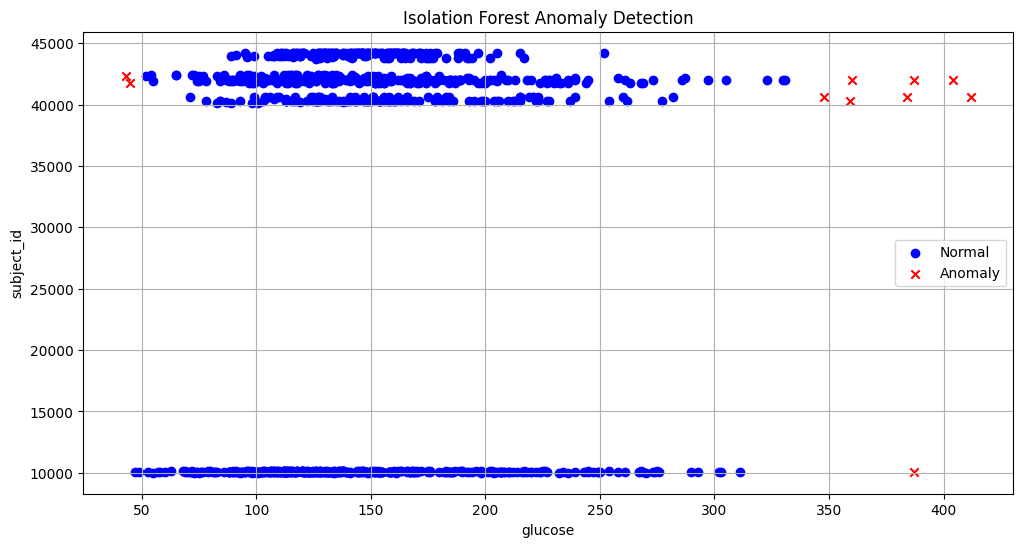

In [ ]:
# Step 2: Apply Isolation Forest
# Initialize Isolation Forest with best parameters
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.01,
    max_features=1.0,
    random_state=42
)

# Fit the model
glucose_ad['anomaly_score'] = iso_forest.fit_predict(glucose_ad[['glucose']])

# Anomalies are labeled as -1, normal points as 1
glucose_ad['is_anomaly'] = glucose_ad['anomaly_score'] == -1

# Step 3: Analyze and Visualize
plt.figure(figsize=(12, 6))

# Plot normal points
plt.scatter(
    glucose_ad['glucose'][~glucose_ad['is_anomaly']],
    glucose_ad['subject_id'][~glucose_ad['is_anomaly']],
    color='blue', label='Normal', marker='o'
)

# Plot anomalies
plt.scatter(
    glucose_ad['glucose'][glucose_ad['is_anomaly']],
    glucose_ad['subject_id'][glucose_ad['is_anomaly']],
    color='red', label='Anomaly', marker='x'
)

plt.xlabel('glucose')
plt.ylabel('subject_id')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
glucose_ad['subject_id'].unique()

array([10006, 10017, 10026, 10027, 10029, 10032, 10033, 10038, 10040,
       10042, 10043, 10044, 10046, 10056, 10059, 10061, 10065, 10083,
       10088, 10094, 10104, 10114, 10119, 10124, 10127, 10132, 40124,
       40204, 40304, 40310, 40456, 40595, 40601, 40612, 40655, 41795,
       41914, 41976, 42135, 42199, 42275, 42292, 42321, 42346, 42412,
       43748, 43779, 43798, 43879, 43881, 43927, 44083, 44212, 44222,
       44228])

In [ ]:
#Check the rows with is_anomaly= True
glucose_ad[glucose_ad['is_anomaly']==True]

,subject_id,glucose,anomaly_score,is_anomaly
531,10094,387.0,-1,True
1292,40310,359.0,-1,True
1359,40595,412.0,-1,True
1361,40595,348.0,-1,True
1391,40655,384.0,-1,True
1415,41795,45.0,-1,True
1557,41976,404.0,-1,True
1559,41976,360.0,-1,True
1560,41976,387.0,-1,True
1732,42292,43.0,-1,True


In [ ]:
# Reset index to make 'charttime' a column
glucose_pivoted_df = glucose_pivoted_df.reset_index()

# Convert 'charttime' to datetime
glucose_pivoted_df['charttime'] = pd.to_datetime(glucose_pivoted_df['charttime'])

# Set 'charttime' as index
glucose_pivoted_df.set_index('charttime')

,index,subject_id,hospital_expire_flag,glucose
charttime,,,,
2164-10-24 00:00:00,0,10006,0,149.0
2164-10-24 03:00:00,1,10006,0,98.0
2164-10-24 06:00:00,2,10006,0,55.0
2164-10-24 08:00:00,3,10006,0,93.0
2164-10-24 12:00:00,4,10006,0,232.0
...,...,...,...,...
2170-12-17 22:00:00,2046,44228,0,112.0
2170-12-18 10:00:00,2047,44228,0,128.0
2170-12-18 22:00:00,2048,44228,0,130.0


##For a specific subject_id for which an anomaly has been detected.
subject_id: 40595

In [ ]:
#Records where subject_id is 40595
glucose_40595 = glucose_pivoted_df[glucose_pivoted_df['subject_id']==40595]

In [ ]:
glucose_40595.head()

,index,subject_id,charttime,hospital_expire_flag,glucose
1352,1352,40595,2144-10-15 11:00:00,0,99.0
1353,1353,40595,2144-10-15 16:00:00,0,71.0
1354,1354,40595,2144-10-15 22:00:00,0,151.0
1355,1355,40595,2144-10-16 10:00:00,0,109.0
1356,1356,40595,2144-10-16 23:00:00,0,166.0


In [ ]:
#Setting charttime as the index, and drop hospital_expire_flag, subject_id, index
glucose_40595.set_index('charttime',inplace=True)
glucose_40595.drop(columns=['hospital_expire_flag','subject_id'],inplace=True)

<ipython-input-142-f074f40d5d1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glucose_40595.drop(columns=['hospital_expire_flag','subject_id'],inplace=True)


In [ ]:
glucose_40595.drop(columns=['index'],inplace=True)

<ipython-input-143-8b1ba71996bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glucose_40595.drop(columns=['index'],inplace=True)


In [ ]:
#Change the charttime to column again
glucose_40595.reset_index(inplace=True)

In [ ]:
glucose_40595.set_index('charttime',inplace=True)

In [ ]:
glucose_40595.shape

(26, 1)

In [ ]:
glucose_40595

,glucose
charttime,
2144-10-15 11:00:00,99.0
2144-10-15 16:00:00,71.0
2144-10-15 22:00:00,151.0
2144-10-16 10:00:00,109.0
2144-10-16 23:00:00,166.0
2144-10-17 10:00:00,221.0
2144-10-17 16:00:00,223.0
2144-10-17 22:00:00,412.0
2144-10-17 22:15:00,282.0


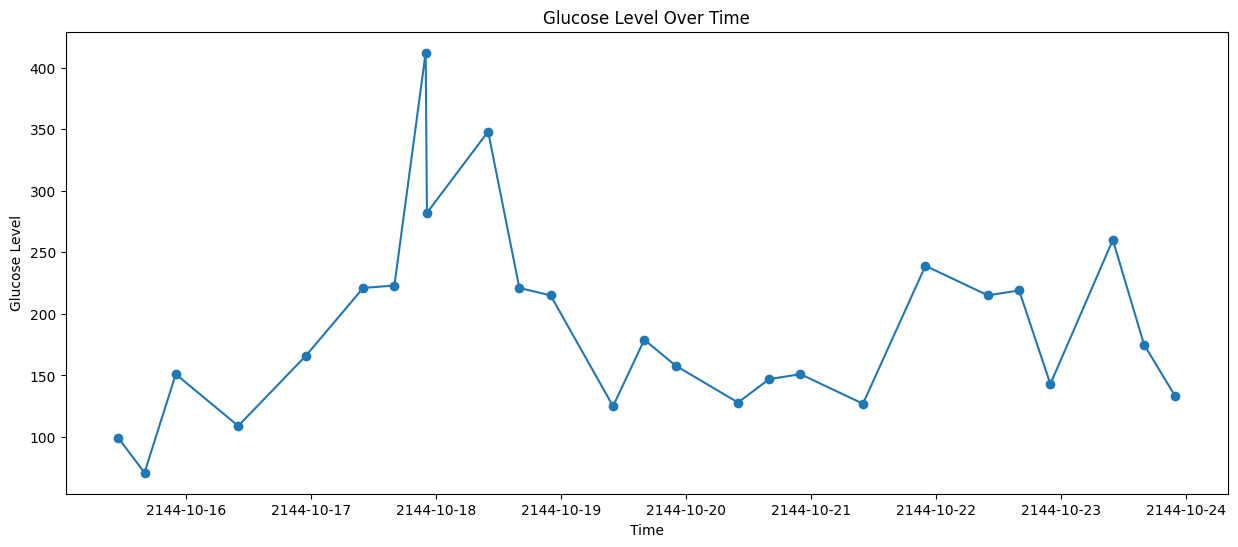

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(glucose_40595.index, glucose_40595['glucose'], marker='o', linestyle='-')
plt.title('Glucose Level Over Time')
plt.xlabel('Time')
plt.ylabel('Glucose Level')
plt.show()

#With Temperature (Degree Fahrenheit)

In [ ]:
temperature_df

charttime   valuenum  itemid  hospital_expire_flag
subject_id                                                                    
40124      0      2130-02-04 04:00:00  35.500000  223761                     0
           73     2130-02-04 08:00:00  35.666667  223761                     0
           137    2130-02-04 12:00:00  35.500000  223761                     0
           174    2130-02-04 16:00:00  35.388889  223761                     0
           208    2130-02-04 20:00:00  35.888889  223761                     0
...                               ...        ...     ...                   ...
44228      378613 2170-12-19 00:00:00  37.444444  223761                     0
           378664 2170-12-19 04:00:00  37.166667  223761                     0
           378687 2170-12-19 08:00:00  37.000000  223761                     0
           378728 2170-12-19 12:00:00  37.055556  223761                     0
           378751 2170-12-19 16:00:00  37.111111  223761                     0

[1976 rows x 4 columns]

In [ ]:
temperature_pivoted_df = temperature_df.pivot_table(index=['subject_id', 'charttime','hospital_expire_flag'], columns='itemid', values='valuenum')

In [ ]:
temperature_pivoted_df

itemid                                                  223761
subject_id charttime           hospital_expire_flag           
40124      2130-02-04 04:00:00 0                     35.500000
           2130-02-04 08:00:00 0                     35.666667
           2130-02-04 12:00:00 0                     35.500000
           2130-02-04 16:00:00 0                     35.388889
           2130-02-04 20:00:00 0                     35.888889
...                                                        ...
44228      2170-12-19 00:00:00 0                     37.444444
           2170-12-19 04:00:00 0                     37.166667
           2170-12-19 08:00:00 0                     37.000000
           2170-12-19 12:00:00 0                     37.055556
           2170-12-19 16:00:00 0                     37.111111

[1976 rows x 1 columns]

In [ ]:
temperature_pivoted_df.columns

Index([223761], dtype='int64', name='itemid')

In [ ]:
# Rename columns for clarity
temperature_pivoted_df.columns = ['temperature']

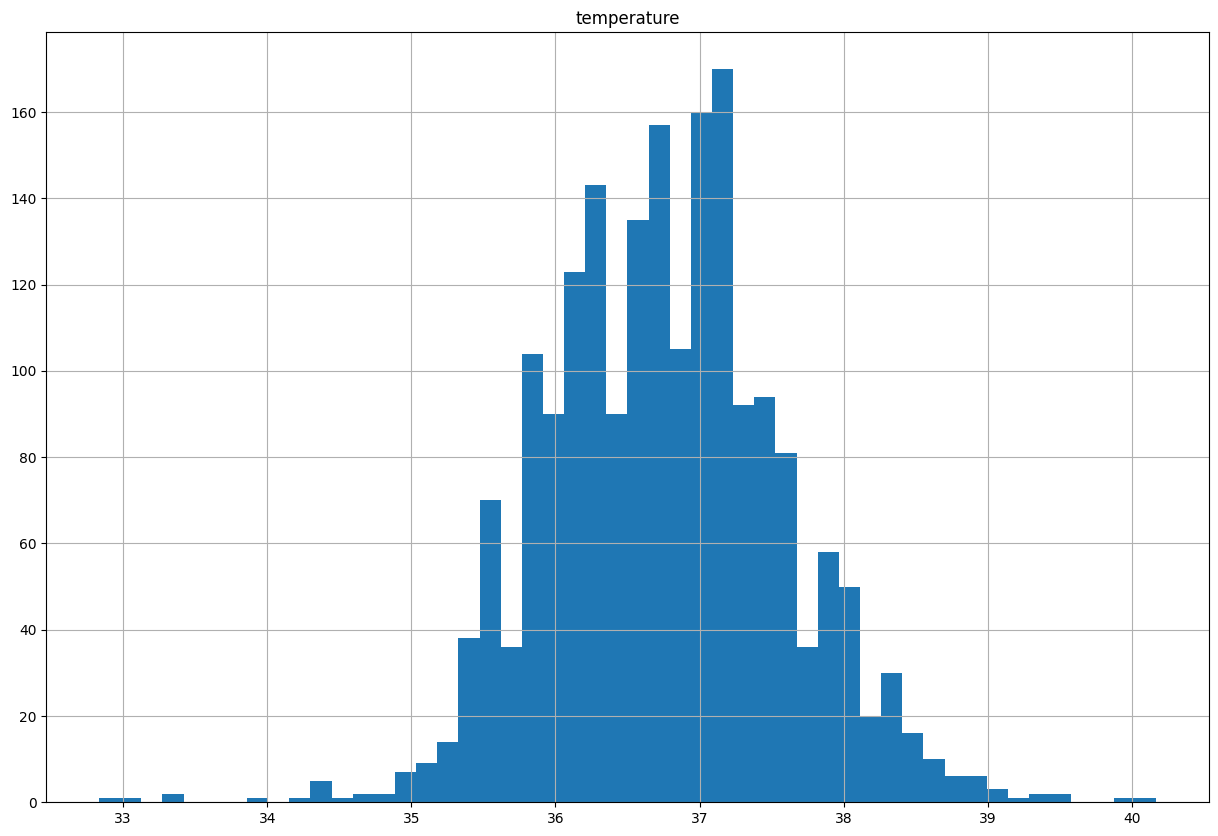

In [ ]:
# Histograms
temperature_pivoted_df.hist(bins=50, figsize=(15, 10))
plt.show()

In [ ]:
temperature_pivoted_df['temperature'].skew()

0.03751956927189893

**Shapiro-Wilk test to check normality**

In [ ]:
from scipy import stats

Null Hypothesis (H₀): The data is normally distributed.

Alternative Hypothesis (H₁): The data is not normally distributed.

In [ ]:
# Check normality using Shapiro-Wilk test

stat, p = stats.shapiro(glucose_pivoted_df['glucose'])
print('p=%.3f' % (p))

p=0.000


p-value is less than 0.05, so we reject the Null Hypothesis (H₀). So we can conclude, that the data is not normally distributed.

**Mann-Whitney U Test** - performing t-test for non-normally distributed variables

H₀: The distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is equal to the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

H₁: The distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is different from the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
expired = temperature_pivoted_df[temperature_pivoted_df.index.get_level_values('hospital_expire_flag') == 1]
not_expired = temperature_pivoted_df[temperature_pivoted_df.index.get_level_values('hospital_expire_flag') == 0]

In [ ]:
statistic, p_value = mannwhitneyu(expired['temperature'], not_expired['temperature'])
print(f"p-value: {p_value:.3f}")

p-value: 0.000


p-value is less than 0.05, so we reject the Null Hypothesis (H₀). So we can conclude, that the distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is different from the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

#Anomaly detection of Temperature by Isolation forest

In [ ]:
temperature_pivoted_df.head()

temperature
subject_id charttime           hospital_expire_flag             
40124      2130-02-04 04:00:00 0                       35.500000
           2130-02-04 08:00:00 0                       35.666667
           2130-02-04 12:00:00 0                       35.500000
           2130-02-04 16:00:00 0                       35.388889
           2130-02-04 20:00:00 0                       35.888889

In [ ]:
#Taking out hospital_expire_flag from index and set as column
temperature_pivoted_df.reset_index(inplace=True)

In [ ]:
#Only keep those rows for which hospital_expire_flag=0
temperature_ad = temperature_pivoted_df[temperature_pivoted_df['hospital_expire_flag']==0]

In [ ]:
temperature_ad.drop(columns=['hospital_expire_flag','charttime'],inplace=True)

<ipython-input-165-2198e8174783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_ad.drop(columns=['hospital_expire_flag','charttime'],inplace=True)


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
temperature_ad.shape

(1275, 2)

In [ ]:
temperature_ad.head()

,subject_id,temperature
0,40124,35.500000
1,40124,35.666667
2,40124,35.500000
3,40124,35.388889
4,40124,35.888889


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_samples': ['auto', 0.5, 0.8],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [1.0]  # Use all features
}

# Initialize Isolation Forest
iso_forest = IsolationForest(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(temperature_ad[['temperature']])

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'contamination': 0.01, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


<ipython-input-171-a3b4e7fbc19c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_ad['anomaly_score'] = iso_forest.fit_predict(temperature_ad[['temperature']])
<ipython-input-171-a3b4e7fbc19c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_ad['is_anomaly'] = temperature_ad['anomaly_score'] == -1


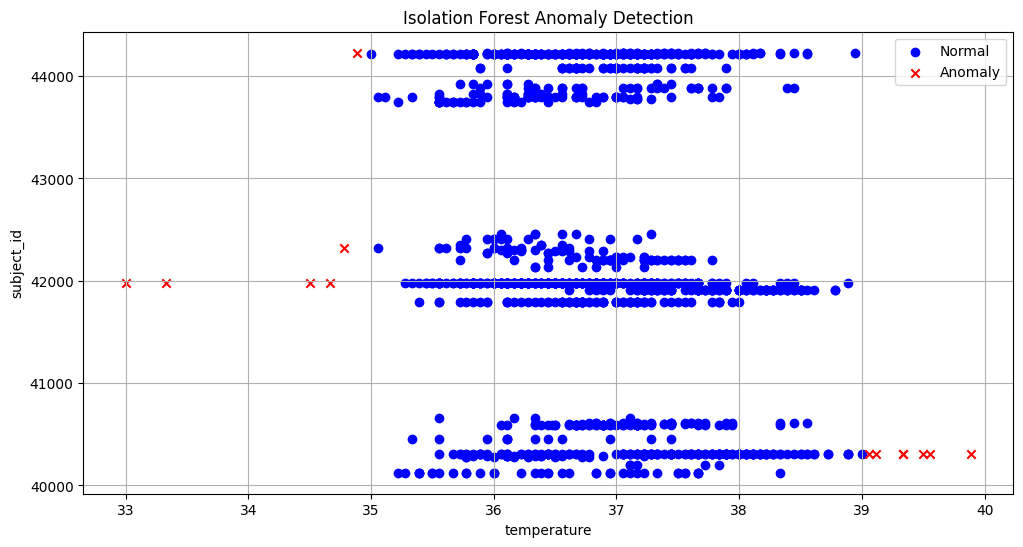

In [ ]:
# Step 2: Apply Isolation Forest
# Initialize Isolation Forest with best parameters
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.01,
    max_features=1.0,
    random_state=42
)

# Fit the model
temperature_ad['anomaly_score'] = iso_forest.fit_predict(temperature_ad[['temperature']])

# Anomalies are labeled as -1, normal points as 1
temperature_ad['is_anomaly'] = temperature_ad['anomaly_score'] == -1

# Step 3: Analyze and Visualize
plt.figure(figsize=(12, 6))

# Plot normal points
plt.scatter(
    temperature_ad['temperature'][~temperature_ad['is_anomaly']],
    temperature_ad['subject_id'][~temperature_ad['is_anomaly']],
    color='blue', label='Normal', marker='o'
)

# Plot anomalies
plt.scatter(
    temperature_ad['temperature'][temperature_ad['is_anomaly']],
    temperature_ad['subject_id'][temperature_ad['is_anomaly']],
    color='red', label='Anomaly', marker='x'
)

plt.xlabel('temperature')
plt.ylabel('subject_id')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
temperature_ad['subject_id'].unique()

array([40124, 40204, 40277, 40286, 40304, 40310, 40456, 40595, 40601,
       40612, 40655, 41795, 41914, 41976, 42135, 42199, 42231, 42275,
       42292, 42302, 42321, 42346, 42412, 42458, 43748, 43779, 43798,
       43827, 43879, 43881, 43927, 44083, 44212, 44222, 44228])

In [ ]:
#Check the rows with is_anomaly= True
temperature_ad[temperature_ad['is_anomaly']==True]

,subject_id,temperature,anomaly_score,is_anomaly
100,40310,39.111111,-1,True
102,40310,39.500000,-1,True
103,40310,39.055556,-1,True
123,40310,39.555556,-1,True
134,40310,39.333333,-1,True
135,40310,39.888889,-1,True
136,40310,39.333333,-1,True
609,41976,33.000000,-1,True
610,41976,33.333333,-1,True
627,41976,34.500000,-1,True


In [ ]:
# Reset index to make 'charttime' a column
temperature_pivoted_df = temperature_pivoted_df.reset_index()

# Convert 'charttime' to datetime
temperature_pivoted_df['charttime'] = pd.to_datetime(temperature_pivoted_df['charttime'])

# Set 'charttime' as index
temperature_pivoted_df.set_index('charttime')

,index,subject_id,hospital_expire_flag,temperature
charttime,,,,
2130-02-04 04:00:00,0,40124,0,35.500000
2130-02-04 08:00:00,1,40124,0,35.666667
2130-02-04 12:00:00,2,40124,0,35.500000
2130-02-04 16:00:00,3,40124,0,35.388889
2130-02-04 20:00:00,4,40124,0,35.888889
...,...,...,...,...
2170-12-19 00:00:00,1971,44228,0,37.444444
2170-12-19 04:00:00,1972,44228,0,37.166667
2170-12-19 08:00:00,1973,44228,0,37.000000


##For a specific subject_id for which an anomaly has been detected.
subject_id: 40310

In [ ]:
#Records where subject_id is 40595
temperature_40310 = temperature_pivoted_df[temperature_pivoted_df['subject_id']==40310]

In [ ]:
temperature_40310.head()

,index,subject_id,charttime,hospital_expire_flag,temperature
99,99,40310,2144-07-13 05:30:00,0,38.611111
100,100,40310,2144-07-13 10:00:00,0,39.111111
101,101,40310,2144-07-13 12:00:00,0,38.888889
102,102,40310,2144-07-13 16:00:00,0,39.500000
103,103,40310,2144-07-13 20:00:00,0,39.055556


In [ ]:
#Setting charttime as the index, and drop hospital_expire_flag, subject_id, index
temperature_40310.set_index('charttime',inplace=True)
temperature_40310.drop(columns=['hospital_expire_flag','subject_id'],inplace=True)

<ipython-input-178-0a53e2cc486d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_40310.drop(columns=['hospital_expire_flag','subject_id'],inplace=True)


In [ ]:
temperature_40310.drop(columns=['index'],inplace=True)

<ipython-input-179-b7ef02d24b1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_40310.drop(columns=['index'],inplace=True)


In [ ]:
#Change the charttime to column again
temperature_40310.reset_index(inplace=True)

In [ ]:
temperature_40310.set_index('charttime',inplace=True)

In [ ]:
temperature_40310.shape

(186, 1)

In [ ]:
temperature_40310

,temperature
charttime,
2144-07-13 05:30:00,38.611111
2144-07-13 10:00:00,39.111111
2144-07-13 12:00:00,38.888889
2144-07-13 16:00:00,39.500000
2144-07-13 20:00:00,39.055556
...,...
2144-12-31 01:00:00,35.944444
2144-12-31 04:00:00,35.555556
2144-12-31 08:00:00,36.500000


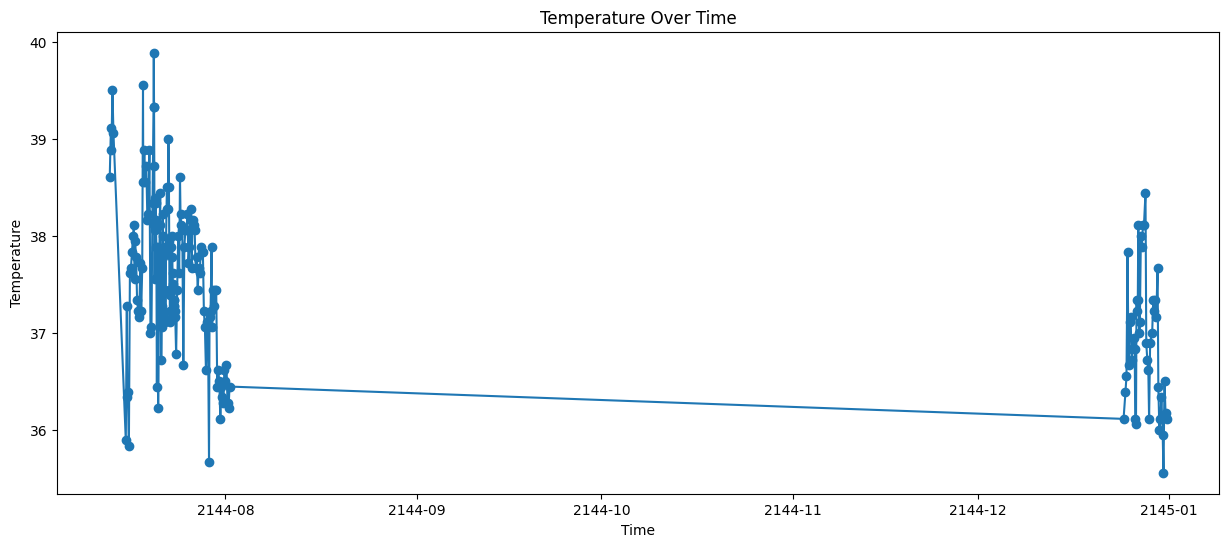

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(temperature_40310.index, temperature_40310['temperature'], marker='o', linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

#With BP Diastolic

In [ ]:
bp_diastolic_df

charttime  valuenum  itemid  hospital_expire_flag
subject_id                                                                   
40177      8264   2169-05-12 04:41:00      26.0  220051                     1
           8277   2169-05-12 05:00:00      26.0  220051                     1
           8286   2169-05-12 05:30:00      28.0  220051                     1
           8294   2169-05-12 05:51:00      31.0  220051                     1
           8299   2169-05-12 06:00:00      32.0  220051                     1
...                               ...       ...     ...                   ...
44228      378267 2170-12-17 15:00:00      63.0  220051                     0
           378277 2170-12-17 16:00:00      65.0  220051                     0
           378288 2170-12-17 17:00:00      68.0  220051                     0
           378297 2170-12-17 18:00:00      66.0  220051                     0
           378308 2170-12-17 19:00:00      65.0  220051                     0

[3017 rows x 4 columns]

In [ ]:
bp_diastolic_pivoted_df = bp_diastolic_df.pivot_table(index=['subject_id', 'charttime','hospital_expire_flag'], columns='itemid', values='valuenum')

In [ ]:
bp_diastolic_pivoted_df

itemid                                               220051
subject_id charttime           hospital_expire_flag        
40177      2169-05-12 04:41:00 1                       26.0
           2169-05-12 05:00:00 1                       26.0
           2169-05-12 05:30:00 1                       28.0
           2169-05-12 05:51:00 1                       31.0
           2169-05-12 06:00:00 1                       32.0
...                                                     ...
44228      2170-12-17 15:00:00 0                       63.0
           2170-12-17 16:00:00 0                       65.0
           2170-12-17 17:00:00 0                       68.0
           2170-12-17 18:00:00 0                       66.0
           2170-12-17 19:00:00 0                       65.0

[3017 rows x 1 columns]

In [ ]:
bp_diastolic_pivoted_df.columns

Index([220051], dtype='int64', name='itemid')

In [ ]:
# Rename columns for clarity
bp_diastolic_pivoted_df.columns = ['bp_diastolic']

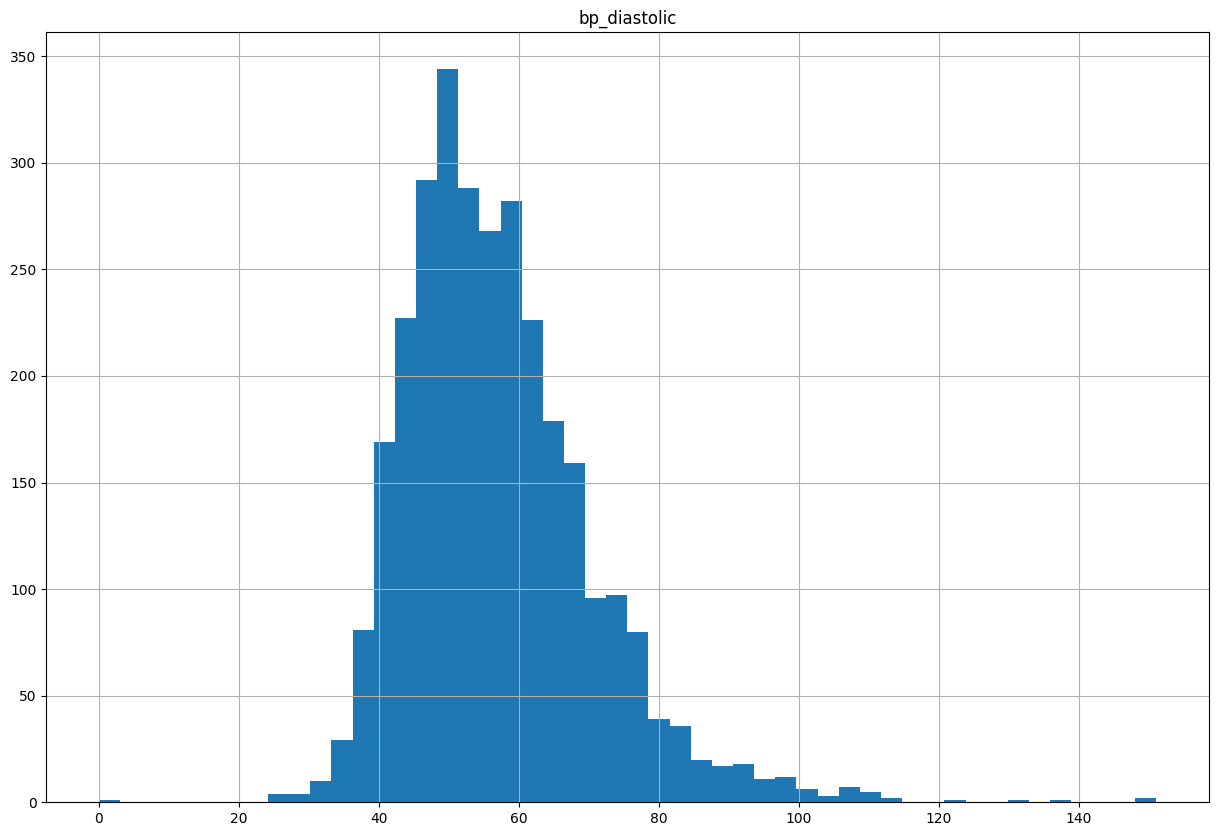

In [ ]:
# Histograms
bp_diastolic_pivoted_df.hist(bins=50, figsize=(15, 10))
plt.show()

In [ ]:
bp_diastolic_pivoted_df['bp_diastolic'].skew()

1.1725293202344838

**Shapiro-Wilk test to check normality**

In [ ]:
from scipy import stats

Null Hypothesis (H₀): The data is normally distributed.

Alternative Hypothesis (H₁): The data is not normally distributed.

In [ ]:
# Check normality using Shapiro-Wilk test

stat, p = stats.shapiro(bp_diastolic_pivoted_df['bp_diastolic'])
print('p=%.3f' % (p))

p=0.000


p-value is less than 0.05, so we reject the Null Hypothesis (H₀). So we can conclude, that the data is not normally distributed.

**Mann-Whitney U Test** - performing t-test for non-normally distributed variables

H₀: The distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is equal to the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

H₁: The distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is different from the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
expired = bp_diastolic_pivoted_df[bp_diastolic_pivoted_df.index.get_level_values('hospital_expire_flag') == 1]
not_expired = bp_diastolic_pivoted_df[bp_diastolic_pivoted_df.index.get_level_values('hospital_expire_flag') == 0]

In [ ]:
statistic, p_value = mannwhitneyu(expired['bp_diastolic'], not_expired['bp_diastolic'])
print(f"p-value: {p_value:.3f}")

p-value: 0.000


p-value is less than 0.05, so we reject the Null Hypothesis (H₀). So we can conclude, that the distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is different from the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

#Anomaly detection of BP_Diastolic by Isolation forest

In [ ]:
bp_diastolic_pivoted_df.head()

bp_diastolic
subject_id charttime           hospital_expire_flag              
40177      2169-05-12 04:41:00 1                             26.0
           2169-05-12 05:00:00 1                             26.0
           2169-05-12 05:30:00 1                             28.0
           2169-05-12 05:51:00 1                             31.0
           2169-05-12 06:00:00 1                             32.0

In [ ]:
#Taking out hospital_expire_flag from index and set as column
bp_diastolic_pivoted_df.reset_index(inplace=True)

In [ ]:
#Only keep those rows for which hospital_expire_flag=0
bp_diastolic_ad = bp_diastolic_pivoted_df[bp_diastolic_pivoted_df['hospital_expire_flag']==0]

In [ ]:
bp_diastolic_ad.drop(columns=['hospital_expire_flag','charttime'],inplace=True)

<ipython-input-201-711a0bb4ab2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_diastolic_ad.drop(columns=['hospital_expire_flag','charttime'],inplace=True)


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
bp_diastolic_ad.shape

(2143, 2)

In [ ]:
bp_diastolic_ad.head()

,subject_id,bp_diastolic
19,40310,69.0
20,40310,78.0
21,40310,43.0
22,40310,48.0
23,40310,48.0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_samples': ['auto', 0.5, 0.8],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [1.0]  # Use all features
}

# Initialize Isolation Forest
iso_forest = IsolationForest(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(bp_diastolic_ad[['bp_diastolic']])

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'contamination': 0.01, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


<ipython-input-206-3b87b7d129d5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_diastolic_ad['anomaly_score'] = iso_forest.fit_predict(bp_diastolic_ad[['bp_diastolic']])
<ipython-input-206-3b87b7d129d5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_diastolic_ad['is_anomaly'] = bp_diastolic_ad['anomaly_score'] == -1


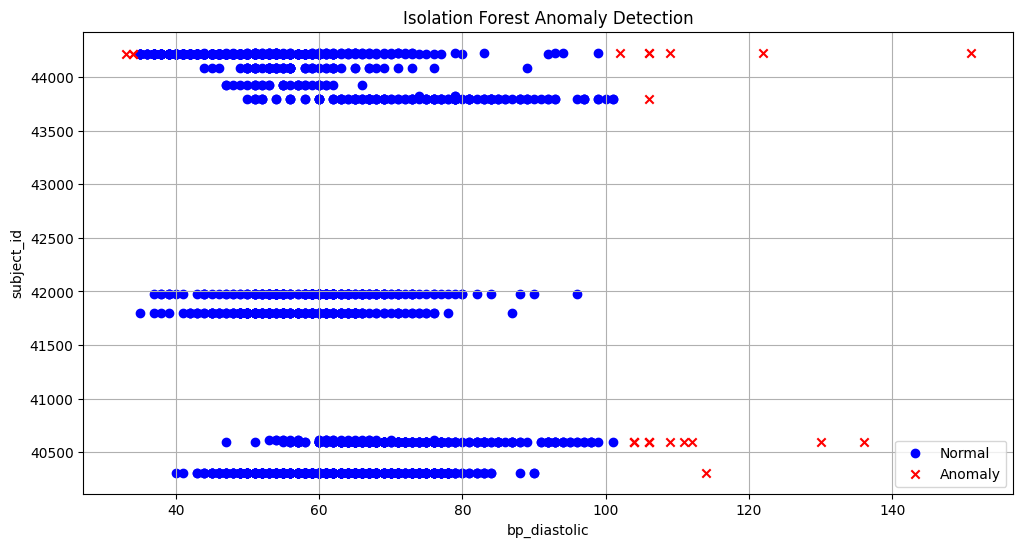

In [ ]:
# Step 2: Apply Isolation Forest
# Initialize Isolation Forest with best parameters
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.01,
    max_features=1.0,
    random_state=42
)

# Fit the model
bp_diastolic_ad['anomaly_score'] = iso_forest.fit_predict(bp_diastolic_ad[['bp_diastolic']])

# Anomalies are labeled as -1, normal points as 1
bp_diastolic_ad['is_anomaly'] = bp_diastolic_ad['anomaly_score'] == -1

# Step 3: Analyze and Visualize
plt.figure(figsize=(12, 6))

# Plot normal points
plt.scatter(
    bp_diastolic_ad['bp_diastolic'][~bp_diastolic_ad['is_anomaly']],
    bp_diastolic_ad['subject_id'][~bp_diastolic_ad['is_anomaly']],
    color='blue', label='Normal', marker='o'
)

# Plot anomalies
plt.scatter(
    bp_diastolic_ad['bp_diastolic'][bp_diastolic_ad['is_anomaly']],
    bp_diastolic_ad['subject_id'][bp_diastolic_ad['is_anomaly']],
    color='red', label='Anomaly', marker='x'
)

plt.xlabel('bp_diastolic')
plt.ylabel('subject_id')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bp_diastolic_ad['subject_id'].unique()

array([40310, 40595, 40612, 41795, 41976, 43798, 43827, 43927, 44083,
       44212, 44228])

In [ ]:
#Check the rows with is_anomaly= True
bp_diastolic_ad[bp_diastolic_ad['is_anomaly']==True]

,subject_id,bp_diastolic,anomaly_score,is_anomaly
190,40310,114.0,-1,True
685,40595,136.0,-1,True
687,40595,111.0,-1,True
700,40595,106.0,-1,True
701,40595,104.0,-1,True
702,40595,130.0,-1,True
703,40595,104.0,-1,True
714,40595,112.0,-1,True
729,40595,104.0,-1,True
733,40595,106.0,-1,True


In [ ]:
# Reset index to make 'charttime' a column
bp_diastolic_pivoted_df = bp_diastolic_pivoted_df.reset_index()

# Convert 'charttime' to datetime
bp_diastolic_pivoted_df['charttime'] = pd.to_datetime(bp_diastolic_pivoted_df['charttime'])

# Set 'charttime' as index
bp_diastolic_pivoted_df.set_index('charttime')

,index,subject_id,hospital_expire_flag,bp_diastolic
charttime,,,,
2169-05-12 04:41:00,0,40177,1,26.0
2169-05-12 05:00:00,1,40177,1,26.0
2169-05-12 05:30:00,2,40177,1,28.0
2169-05-12 05:51:00,3,40177,1,31.0
2169-05-12 06:00:00,4,40177,1,32.0
...,...,...,...,...
2170-12-17 15:00:00,3012,44228,0,63.0
2170-12-17 16:00:00,3013,44228,0,65.0
2170-12-17 17:00:00,3014,44228,0,68.0


##For a specific subject_id for which an anomaly has been detected.
subject_id: 40595

In [ ]:
#Records where subject_id is 40595

bp_diastolic_40595 = bp_diastolic_pivoted_df[bp_diastolic_pivoted_df['subject_id']==40595]

In [ ]:
bp_diastolic_40595.head()

,index,subject_id,charttime,hospital_expire_flag,bp_diastolic
516,516,40595,2144-10-15 15:30:00,0,89.0
517,517,40595,2144-10-15 15:47:00,0,81.0
518,518,40595,2144-10-15 15:50:00,0,87.0
519,519,40595,2144-10-15 15:55:00,0,85.0
520,520,40595,2144-10-15 16:00:00,0,85.0


In [ ]:
#Setting charttime as the index, and drop hospital_expire_flag, subject_id, index
bp_diastolic_40595.set_index('charttime',inplace=True)
bp_diastolic_40595.drop(columns=['hospital_expire_flag','subject_id'],inplace=True)

<ipython-input-212-d7ab80bdda0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_diastolic_40595.drop(columns=['hospital_expire_flag','subject_id'],inplace=True)


In [ ]:
bp_diastolic_40595.drop(columns=['index'],inplace=True)

<ipython-input-213-9d3843b0f279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_diastolic_40595.drop(columns=['index'],inplace=True)


In [ ]:
#Change the charttime to column again
bp_diastolic_40595.reset_index(inplace=True)

In [ ]:
bp_diastolic_40595.set_index('charttime',inplace=True)

In [ ]:
bp_diastolic_40595.shape

(235, 1)

In [ ]:
bp_diastolic_40595

,bp_diastolic
charttime,
2144-10-15 15:30:00,89.0
2144-10-15 15:47:00,81.0
2144-10-15 15:50:00,87.0
2144-10-15 15:55:00,85.0
2144-10-15 16:00:00,85.0
...,...
2144-10-23 18:00:00,93.0
2144-10-23 19:00:00,99.0
2144-10-23 20:00:00,91.0


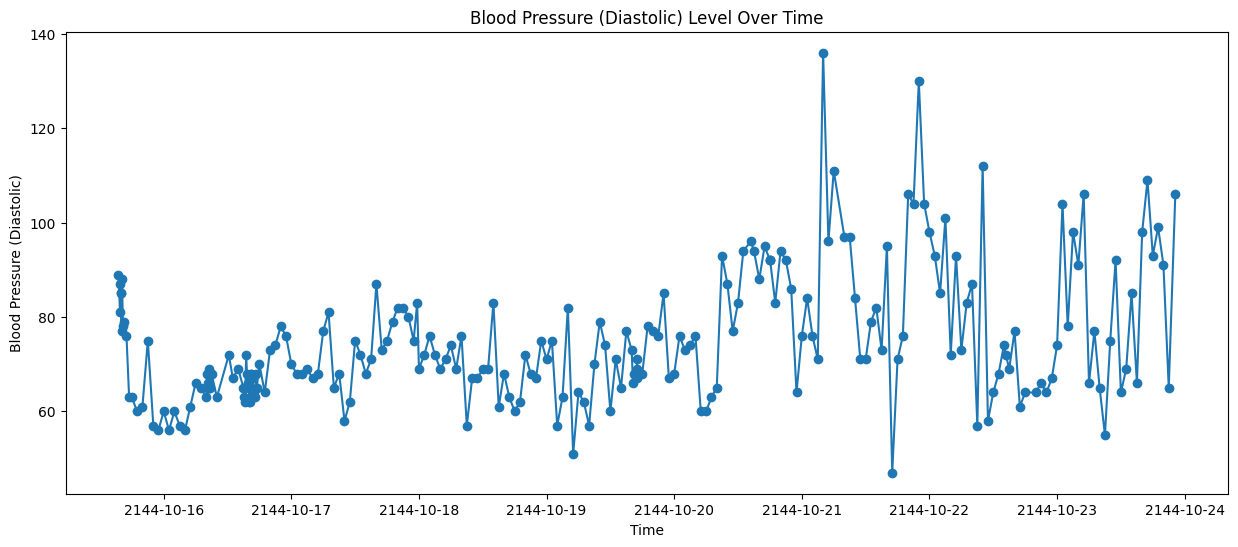

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(bp_diastolic_40595.index, bp_diastolic_40595['bp_diastolic'], marker='o', linestyle='-')
plt.title('Blood Pressure (Diastolic) Level Over Time')
plt.xlabel('Time')
plt.ylabel('Blood Pressure (Diastolic)')
plt.show()

#With BP_Systolic

In [ ]:
bp_systolic_df

charttime  valuenum  itemid  hospital_expire_flag
subject_id                                                                   
40177      8263   2169-05-12 04:41:00      75.0  220050                     1
           8276   2169-05-12 05:00:00      82.0  220050                     1
           8285   2169-05-12 05:30:00      75.0  220050                     1
           8293   2169-05-12 05:51:00      78.0  220050                     1
           8298   2169-05-12 06:00:00      99.0  220050                     1
...                               ...       ...     ...                   ...
44228      378266 2170-12-17 15:00:00      88.0  220050                     0
           378276 2170-12-17 16:00:00      95.0  220050                     0
           378287 2170-12-17 17:00:00      95.0  220050                     0
           378296 2170-12-17 18:00:00     119.0  220050                     0
           378307 2170-12-17 19:00:00     120.0  220050                     0

[3018 rows x 4 columns]

In [ ]:
bp_systolic_pivoted_df = bp_systolic_df.pivot_table(index=['subject_id', 'charttime','hospital_expire_flag'], columns='itemid', values='valuenum')

In [ ]:
bp_systolic_pivoted_df

itemid                                               220050
subject_id charttime           hospital_expire_flag        
40177      2169-05-12 04:41:00 1                       75.0
           2169-05-12 05:00:00 1                       82.0
           2169-05-12 05:30:00 1                       75.0
           2169-05-12 05:51:00 1                       78.0
           2169-05-12 06:00:00 1                       99.0
...                                                     ...
44228      2170-12-17 15:00:00 0                       88.0
           2170-12-17 16:00:00 0                       95.0
           2170-12-17 17:00:00 0                       95.0
           2170-12-17 18:00:00 0                      119.0
           2170-12-17 19:00:00 0                      120.0

[3018 rows x 1 columns]

In [ ]:
bp_systolic_pivoted_df.columns

Index([220050], dtype='int64', name='itemid')

In [ ]:
# Rename columns for clarity
bp_systolic_pivoted_df.columns = ['bp_systolic']

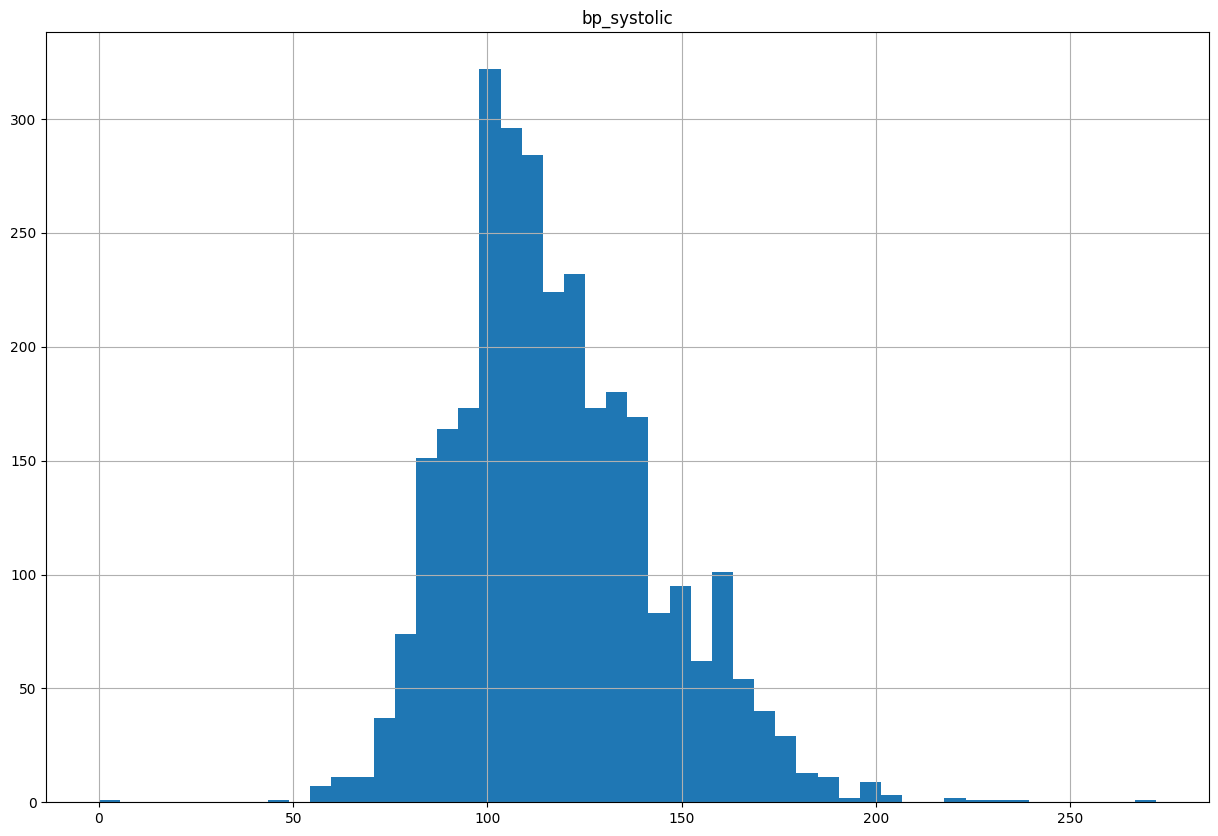

In [ ]:
# Histograms
bp_systolic_pivoted_df.hist(bins=50, figsize=(15, 10))
plt.show()

In [ ]:
bp_systolic_pivoted_df['bp_systolic'].skew()

0.6428879820124541

**Shapiro-Wilk test to check normality**

In [ ]:
from scipy import stats

Null Hypothesis (H₀): The data is normally distributed.

Alternative Hypothesis (H₁): The data is not normally distributed.

In [ ]:
# Check normality using Shapiro-Wilk test

stat, p = stats.shapiro(bp_systolic_pivoted_df['bp_systolic'])
print('p=%.3f' % (p))

p=0.000


p-value is less than 0.05, so we reject the Null Hypothesis (H₀). So we can conclude, that the data is not normally distributed.

**Mann-Whitney U Test** - performing t-test for non-normally distributed variables

H₀: The distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is equal to the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

H₁: The distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is different from the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
expired = bp_systolic_pivoted_df[bp_systolic_pivoted_df.index.get_level_values('hospital_expire_flag') == 1]
not_expired = bp_systolic_pivoted_df[bp_systolic_pivoted_df.index.get_level_values('hospital_expire_flag') == 0]

In [ ]:
statistic, p_value = mannwhitneyu(expired['bp_systolic'], not_expired['bp_systolic'])
print(f"p-value: {p_value:.3f}")

p-value: 0.000


p-value is less than 0.05, so we reject the Null Hypothesis (H₀). So we can conclude, that the distribution of the variable for patients who did not expire (hospital_expire_flag = 0) is different from the distribution of the variable for patients who did expire (hospital_expire_flag = 1).

#Anomaly detection of BP_Systolic by Isolation forest

In [ ]:
bp_systolic_pivoted_df.head()

bp_systolic
subject_id charttime           hospital_expire_flag             
40177      2169-05-12 04:41:00 1                            75.0
           2169-05-12 05:00:00 1                            82.0
           2169-05-12 05:30:00 1                            75.0
           2169-05-12 05:51:00 1                            78.0
           2169-05-12 06:00:00 1                            99.0

In [ ]:
#Taking out hospital_expire_flag from index and set as column
bp_systolic_pivoted_df.reset_index(inplace=True)

In [ ]:
#Only keep those rows for which hospital_expire_flag=0
bp_systolic_ad = bp_systolic_pivoted_df[bp_systolic_pivoted_df['hospital_expire_flag']==0]

In [ ]:
bp_systolic_ad.drop(columns=['hospital_expire_flag','charttime'],inplace=True)

<ipython-input-237-d4b6b8e97562>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_systolic_ad.drop(columns=['hospital_expire_flag','charttime'],inplace=True)


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
bp_systolic_ad.shape

(2144, 2)

In [ ]:
bp_systolic_ad.head()

,subject_id,bp_systolic
19,40310,140.0
20,40310,137.0
21,40310,93.0
22,40310,86.0
23,40310,93.0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_samples': ['auto', 0.5, 0.8],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [1.0]  # Use all features
}

# Initialize Isolation Forest
iso_forest = IsolationForest(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(bp_systolic_ad[['bp_systolic']])

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'contamination': 0.01, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


<ipython-input-242-2f912ce14bac>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_systolic_ad['anomaly_score'] = iso_forest.fit_predict(bp_systolic_ad[['bp_systolic']])
<ipython-input-242-2f912ce14bac>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_systolic_ad['is_anomaly'] = bp_systolic_ad['anomaly_score'] == -1


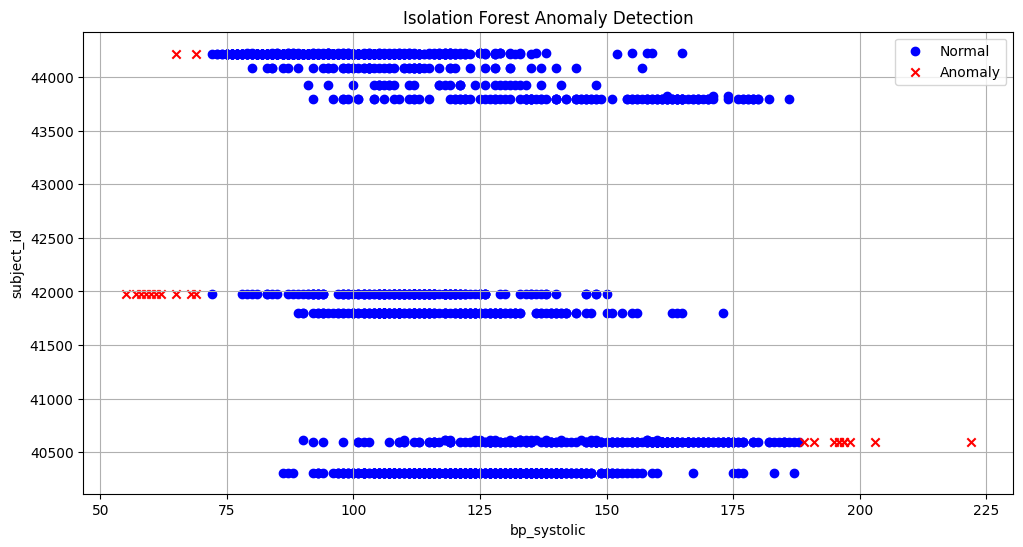

In [ ]:
# Step 2: Apply Isolation Forest
# Initialize Isolation Forest with best parameters
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.01,
    max_features=1.0,
    random_state=42
)

# Fit the model
bp_systolic_ad['anomaly_score'] = iso_forest.fit_predict(bp_systolic_ad[['bp_systolic']])

# Anomalies are labeled as -1, normal points as 1
bp_systolic_ad['is_anomaly'] = bp_systolic_ad['anomaly_score'] == -1

# Step 3: Analyze and Visualize
plt.figure(figsize=(12, 6))

# Plot normal points
plt.scatter(
    bp_systolic_ad['bp_systolic'][~bp_systolic_ad['is_anomaly']],
    bp_systolic_ad['subject_id'][~bp_systolic_ad['is_anomaly']],
    color='blue', label='Normal', marker='o'
)

# Plot anomalies
plt.scatter(
    bp_systolic_ad['bp_systolic'][bp_systolic_ad['is_anomaly']],
    bp_systolic_ad['subject_id'][bp_systolic_ad['is_anomaly']],
    color='red', label='Anomaly', marker='x'
)

plt.xlabel('bp_systolic')
plt.ylabel('subject_id')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bp_systolic_ad['subject_id'].unique()

array([40310, 40595, 40612, 41795, 41976, 43798, 43827, 43927, 44083,
       44212, 44228])

In [ ]:
#Check the rows with is_anomaly= True
bp_systolic_ad[bp_systolic_ad['is_anomaly']==True]

,subject_id,bp_systolic,anomaly_score,is_anomaly
516,40595,196.0,-1,True
517,40595,195.0,-1,True
518,40595,222.0,-1,True
520,40595,203.0,-1,True
623,40595,196.0,-1,True
624,40595,191.0,-1,True
653,40595,197.0,-1,True
664,40595,189.0,-1,True
665,40595,198.0,-1,True
671,40595,197.0,-1,True


In [ ]:
# Reset index to make 'charttime' a column
bp_systolic_pivoted_df = bp_systolic_pivoted_df.reset_index()

# Convert 'charttime' to datetime
bp_systolic_pivoted_df['charttime'] = pd.to_datetime(bp_systolic_pivoted_df['charttime'])

# Set 'charttime' as index
bp_systolic_pivoted_df.set_index('charttime')

,index,subject_id,hospital_expire_flag,bp_systolic
charttime,,,,
2169-05-12 04:41:00,0,40177,1,75.0
2169-05-12 05:00:00,1,40177,1,82.0
2169-05-12 05:30:00,2,40177,1,75.0
2169-05-12 05:51:00,3,40177,1,78.0
2169-05-12 06:00:00,4,40177,1,99.0
...,...,...,...,...
2170-12-17 15:00:00,3013,44228,0,88.0
2170-12-17 16:00:00,3014,44228,0,95.0
2170-12-17 17:00:00,3015,44228,0,95.0


##For a specific subject_id for which an anomaly has been detected.
subject_id: 40595

In [ ]:
#Records where subject_id is 40595

bp_systolic_40595 = bp_systolic_pivoted_df[bp_systolic_pivoted_df['subject_id']==40595]

In [ ]:
bp_systolic_40595.head()

,index,subject_id,charttime,hospital_expire_flag,bp_systolic
516,516,40595,2144-10-15 15:30:00,0,196.0
517,517,40595,2144-10-15 15:47:00,0,195.0
518,518,40595,2144-10-15 15:50:00,0,222.0
519,519,40595,2144-10-15 15:55:00,0,163.0
520,520,40595,2144-10-15 16:00:00,0,203.0


In [ ]:
#Setting charttime as the index, and drop hospital_expire_flag, subject_id, index
bp_systolic_40595.set_index('charttime',inplace=True)
bp_systolic_40595.drop(columns=['hospital_expire_flag','subject_id'],inplace=True)

<ipython-input-248-e21775d35e54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_systolic_40595.drop(columns=['hospital_expire_flag','subject_id'],inplace=True)


In [ ]:
bp_systolic_40595.drop(columns=['index'],inplace=True)

<ipython-input-249-3e7d45379f7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_systolic_40595.drop(columns=['index'],inplace=True)


In [ ]:
#Change the charttime to column again
bp_systolic_40595.reset_index(inplace=True)

In [ ]:
bp_systolic_40595.set_index('charttime',inplace=True)

In [ ]:
bp_systolic_40595.shape

(235, 1)

In [ ]:
bp_systolic_40595

,bp_systolic
charttime,
2144-10-15 15:30:00,196.0
2144-10-15 15:47:00,195.0
2144-10-15 15:50:00,222.0
2144-10-15 15:55:00,163.0
2144-10-15 16:00:00,203.0
...,...
2144-10-23 18:00:00,116.0
2144-10-23 19:00:00,109.0
2144-10-23 20:00:00,113.0


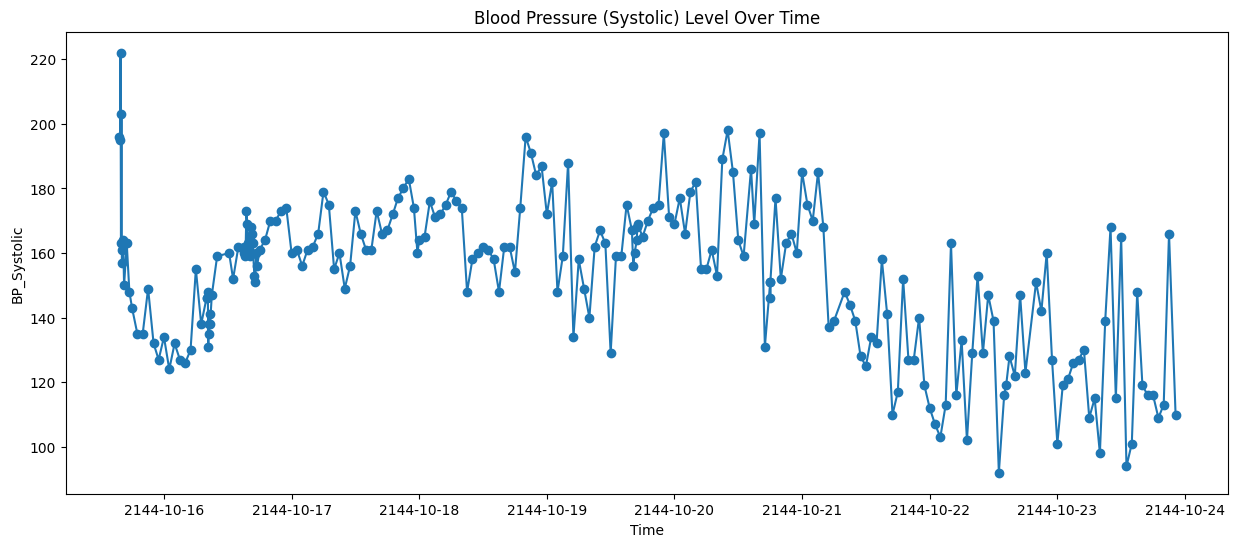

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(bp_systolic_40595.index, bp_systolic_40595['bp_systolic'], marker='o', linestyle='-')
plt.title('Blood Pressure (Systolic) Level Over Time')
plt.xlabel('Time')
plt.ylabel('BP_Systolic')
plt.show()